In [1]:
num_points = 500
rs = LinRange(0, 1, num_points)
θs = LinRange(0, 2π, num_points)
pairs = [(r, θ) for r in rs for θ in θs]
xs = [pair[1] * cos(pair[2]) for pair in pairs]
ys = [pair[1] * sin(pair[2]) for pair in pairs]
xs = LinRange(-1, 1, num_points)
ys = LinRange(-1, 1, num_points)
function f(x, y; scale=1)
    r = sqrt(x^2 + y^2)
    if r1 < r < r2
        1*scale
    else
        0
    end
end


f (generic function with 1 method)

In [2]:
interionic_spacing = .2
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = 1
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end

# using Plots
# gr() # We will continue onward using the GR backend
# plot(heatmap(xs, ys, f, alpha=.1; c=palette([:white, :blue], 2)))
# plot!(x, y, seriestype = :scatter, title = "Top View of Penning Trap", legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)

#plot!(arcshape(0,2π), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)

circleShape (generic function with 1 method)

In [3]:
function plot_triangles_across_unit_disk(f, x, y)
    infids = []
    ψ1s = []
    ψ2s = []
    for (i, xx) in enumerate(x)
        print(i)
        ρ = sqrt(xx^2 + y[i]^2)
        ϕ = atan(y[i], xx)
        infid, ψ1, ψ2 = f(ρ, ϕ)
        push!(infids, infid)
        push!(ψ1s, ψ1)
        push!(ψ2s, ψ2)
        end
    infids, ψ1s, ψ2s
end
# function plot_triangles_across_unit_disk(f, x, y)
#     ψ1s = []
#     for (i, xx) in enumerate(x)
#         print(i)
#         ρ = sqrt(xx^2 + y[i]^2)
#         ϕ = atan(y[i], xx)
#         ψ1 = f(ρ, ϕ)
#         push!(ψ1s, ψ1)
#         end
#    ψ1s
# end

plot_triangles_across_unit_disk (generic function with 1 method)

In [4]:
using SpecialFunctions
using QuantumOptics

function fidelity(ρ, σ)
    print(ρ, σ)
    tr(sqrt(sqrt(ρ) * σ * sqrt(ρ)))^(1/2)
end

function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function unpack_zernike(zernike_coefficients_even, zernike_coefficients_odd, ρ, ω, t)
    Pevens = []
    eventuples = []
    for (m, zeven) in enumerate(zernike_coefficients_even)
        meven = m - 1
        push!(Pevens, [zeven[i] * R(i-1, meven, ρ) for i in Array(range(1, length(zeven), step=1))])
    end
    for i in range(1, length(Pevens), step=1)
        rotationeven = - (i - 1) * ω * t
        total = sum(Pevens[i])
        push!(eventuples, (i - 1, total, rotationeven))
    end
    eventuples # No odd tuples, so we'll leave it simple. (In fact, only m=0 again but we'll test this.)
end

toarray(s::Union{Set, Array}) = [toarray.(s)...]
toarray(v::Number) = v

toarray (generic function with 2 methods)

In [5]:
toarray(Set(rhos))

LoadError: UndefVarError: rhos not defined

In [6]:
r2 = .65
r1 = .450
function Q(n::Int64, r2::Float64, r1::Float64)
    if n % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(big(Int(n/2 - k)))*factorial(big(Int(n/2 - k))))*((r2)^(n-2*k + 1)-(r1)^(n-2*k + 1))/(n-2k+1)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n)/2), step=1)))
    end

        end

function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end


R (generic function with 1 method)

In [7]:
#[(i + 1)*Q(i, r2, r1) for i in range(0, 100, step=1)]

In [8]:
coefficients = """{-0.2,0.,0.233,0.,0.249543,0.,-0.545509,0.,0.157186,0.,0.442858,0.,-0.483505,0.,-0.0279013,0.,0.395124,0.,-0.244846,0.,-0.0752922,0.,0.151185,0.,-0.0629617,0.,0.0653368,0.,-0.0918658,0.,-0.0579087,0.,0.253973,0.,-0.171869,0.,-0.156964,0.,0.316152,0.,-0.0988666,0.,-0.19511,0.,0.210798,0.,-0.0169868,0.,-0.0892204,0.,0.0523937,0.,-0.0442548,0.,0.0873793,0.,-0.0189468,0.,-0.157734,0.,0.192673,0.,0.0227433,0.,-0.232585,0.,0.163608,0.,0.0792017,0.,-0.181299,0.,0.0702344,0.,0.0453676,0.,-0.0431357,0.,0.0298658,0.,-0.0767145,0.,0.0637158,0.,0.0808792,0.,-0.184712,0.,0.0675169,0.,0.149599,0.,-0.187767,0.,0.0105572,0.,0.137866,0.,-0.0996872,0.,-0.00718339,0.,0.0314139,0.,-0.0173592,0.,0.0591402,0.,-0.0863635,0.,-0.0141585,0.,0.152382,0.,-0.124513,0.,-0.06556,0.,0.178408,0.,-0.0778502,0.,-0.0835793,0.,0.108148,0.,-0.0248243,0.,-0.0174415,0.,0.00642603,0.,-0.0373508,0.,0.0902417,0.,-0.0396592,0.,-0.103057,0.,0.149898,0.,-0.0120148,0.,-0.142364,0.,0.120164,0.,0.025495,0.,-0.0979085,0.,0.0482319,0.,0.00252704,0.,0.00261187,0.,0.0146597,0.,-0.078694,0.,0.0766846,0.,0.0456948,0.,-0.145996,0.,0.0745684,0.,0.0883913,0.,-0.135873,0.,0.0283619,0.,0.0727316,0.,-0.0609587,0.,0.0115629,0.,-0.00944963,0.,0.00578884,0.,0.0560875,0.,-0.0946076,0.,0.0103913,0.,0.117794,0.,-0.115352,0.,-0.0267332,0.,0.126209,0.,-0.0706772,0.,-0.0379665,0.,0.0621487,0.,-0.0229921,0.,0.0139489,0.,-0.021513,0.,-0.0275928,0.,0.0936075,0.,-0.0568627,0.,-0.0728771,0.,0.130891,0.,-0.0321407,0.,-0.0956125,0.,0.09611,0.,-0.0000342053,0.,-0.0525252,0.,0.0301967,0.,-0.0161492,0.,0.0310049,0.,-0.0014545,0.,-0.0764331,0.,0.0875385,0.,0.0204724,0.,-0.121588,0.,0.0790182,0.,0.0512008,0.,-0.10214,0.,0.0348158,0.,0.0343717,0.,-0.032179,0.,0.0162324,0.,-0.0338536,0.,0.02629,0.,0.047928,0.,-0.0992122,0.,0.0299221,0.,0.0915784,0.,-0.10727,0.,-0.00167076,0.,0.0894109,0.,-0.0607977,0.,-0.0112064,0.,0.0287136,0.,-0.0144812,0.,0.0306831,0.,-0.043366,0.,-0.0141851,0.,0.0919641,0.,-0.0699796,0.,-0.0479308,0.,0.113757,0.,-0.0440959,0.,-0.0615382,0.,0.074127,0.,-0.0127762,0.,-0.0204283,0.,0.011247,0.,-0.0229328,0.,0.050778,0.,-0.0184807,0.,-0.068932,0.,0.0937724,0.,-0.00062329,0.,-0.0991445,0.,0.0784498,0.,0.024416,0.,-0.0732487,0.,0.0333913,0.,0.00873877,0.,-0.00693494,0.,0.0125349,0.,-0.0484068,0.,0.0445494,0.,0.0355939,0.,-0.0985699,0.,0.0451959,0.,0.0675977,0.,-0.0961606,0.,0.0148412,0.,0.0590884,0.,-0.0471578,0.,0.00435918,0.,0.00200058,0.,-0.00155033,0.,0.0377644,0.,-0.060127,0.,0.00129468,0.,0.0850781,0.,-0.078219,0.,-0.0258952,0.,0.0951692,0.,-0.0491379,0.,-0.0348164,0.,0.0518738,0.,-0.0166097,0.,0.0030513,0.,-0.00817102,0.,-0.0215885,0.,0.0634576,0.,-0.0349178,0.,-0.057099,0.,0.094638,0.,-0.0178533,0.,-0.0767821,0.,0.0726027,0.,0.00523424,0.,-0.046974,0.,0.0258775,0.,-0.00767912,0.,0.0152521,0.,0.00326942,0.,-0.0550465,0.,0.0595556,0.,0.0206867,0.,-0.0926275,0.,0.0556649,0.,0.0452886,0.,-0.0815495,0.,0.024106,0.,0.033602,0.,-0.0305218,0.,0.0113371,0.,-0.0189392,0.,0.013782,0.,0.0373956,0.,-0.0714875,0.,0.0170342,0.,0.0737232,0.,-0.081059,0.,-0.00707922,0.,0.0750335,0.,-0.0478953,0.,-0.0143835,0.,0.0296958,0.,-0.0135311,0.,0.0191305,0.,-0.0267144,0.,-0.0144176,0.,0.0695006,0.,-0.0491712,0.,-0.0423689,0.,0.0901159,0.,-0.0305675,0.,-0.0549141,0.,0.0619965,0.,-0.00705892,0.,-0.0235133,0.,0.0138932,0.,-0.0162933,0.,0.0336699,0.,-0.00934965}"""
coefficients = eval(Meta.parse(replace(replace(replace(coefficients, "}"=> ']'), '{'=>'['), "\n"=> "")));

In [9]:
length(coefficients)

501

In [44]:
rhos = [0.9159148432032315, 0.2, 0.4, 0.8, 0.7889233169326408, 0.866083136886985, 0.5281098370604357, 1.0, 0.1972308292331602, 0.3944616584663204, 0.6, 0.34, 0.6896375859826667, 0.986154146165801, 0.5197114584074514, 0.0, 0.9013878188659973, 0.9068627239003707, 0.8558621384311844, 0.68, 0.5916924876994806, 0.34481879299133333, 0.5249761899362676, 0.8692525524840293, 0.7088018058667741, 0.7142128534267638, 0.7203471385380801]

27-element Array{Float64,1}:
 0.9159148432032315
 0.2
 0.4
 0.8
 0.7889233169326408
 0.866083136886985
 0.5281098370604357
 1.0
 0.1972308292331602
 0.3944616584663204
 0.6
 0.34
 0.6896375859826667
 ⋮
 0.0
 0.9013878188659973
 0.9068627239003707
 0.8558621384311844
 0.68
 0.5916924876994806
 0.34481879299133333
 0.5249761899362676
 0.8692525524840293
 0.7088018058667741
 0.7142128534267638
 0.7203471385380801

In [45]:
str = """{{1.,0.,0.677746,0.,0.189009,0.,-0.238331,0.,-0.42443,0.,-0.327115,0.,-0.0527602,0.,0.213977,0.,0.318081,0.,0.217001,0.,-0.00683665,0.,-0.20612,0.,-0.261485,0.,-0.150544,0.,0.0460343,0.,0.200827,0.,0.220555,0.,0.101154,0.,-0.0749974,0.,-0.194813,0.,-0.186219,0.,-0.0608711,0.,0.097119,0.,0.187007,0.,0.155133,0.,0.0265488,0.,-0.113871,0.,-0.177059,0.,-0.125911,0.,0.00322414,0.,0.126012,0.,0.164933,0.,0.0979978,0.,-0.0291123,0.,-0.133997,0.,-0.150756,0.,-0.0712358,0.,0.0514269,0.,0.138153,0.,0.134756,0.,0.045678,0.,-0.0703079,0.,-0.138758,0.,-0.117225,0.,-0.0214876,0.,0.0858172,0.,0.136081,0.,0.0985024,0.,-0.00111725,0.,-0.0979911,0.,-0.130403,0.,-0.0789574,0.,0.0218983,0.,0.10687,0.,0.122028,0.,0.0589767,0.,-0.0406202,0.,-0.112519,0.,-0.111284,0.,-0.0389544,0.,0.0570674,0.,0.115036,0.,0.0985259,0.,0.019281,0.,-0.0710554,0.,-0.114558,0.,-0.0841278,0.,-0.000334876,0.,0.08244,0.,0.111267,0.,0.0684818,0.,-0.017527,0.,-0.0911235,0.,-0.105384,0.,-0.05199,0.,0.0339768,0.,0.0970582,0.,0.0971717,0.,0.0350572,0.,-0.0487227,0.,-0.100249,0.,-0.0869272,0.,-0.0180837,0.,0.0615152,0.,0.100755,0.,0.0749782,0.,0.00145757,0.,-0.0721521,0.,-0.0986868,0.,-0.0616762,0.,0.0144532,0.,0.0804819,0.,0.0942036,0.,0.0473891,0.,-0.0293076,0.,-0.0864074,0.,-0.0875121,0.,-0.0324939,0.,0.0427987,0.,0.0898859,0.,0.0788597,0.,0.0173684,0.,-0.0546592,0.,-0.0909302,0.,-0.0685289,0.,-0.0023838,0.,0.0646664,0.,0.0896067,0.,0.0568311,0.,-0.0121039,0.,-0.0726466,0.,-0.0860334,0.,-0.0440989,0.,0.0257608,0.,0.0784775,0.,0.0803763,0.,0.0306787,0.,-0.0382822,0.,-0.0820901,0.,-0.0728444,0.,-0.0169224,0.,0.0493989,0.,0.0834691,0.,0.0636844,0.,0.00317963,0.,-0.0588822,0.,-0.082652,0.,-0.0531744,0.,0.0102104,0.,0.0665487,0.,0.0797273,0.,0.0416166,0.,-0.0229261,0.,-0.072263,0.,-0.0748313,0.,-0.0293298,0.,0.034671,0.,0.0759404,0.,0.0681438,0.,0.0166421,0.,-0.0451795,0.,-0.0775473,0.,-0.0598832,0.,-0.00388237,0.,0.0542231,0.,0.0771011,0.,0.0503002,0.,-0.00862698,0.,-0.0616147,0.,-0.0746688,0.,-0.0396716,0.,0.0205778,0.,0.0672119,0.,0.0703641,0.,0.0282928,0.,-0.0316832,0.,-0.0709201,0.,-0.064344,0.,-0.0164705,0.,0.0416839,0.,0.0726932,0.,0.056804,0.,0.00451514,0.,-0.050354,0.,-0.0725339,0.,-0.0479723,0.,0.00726676,0.,0.0575056,0.,0.0704929,0.,0.0381044,0.,-0.0185799,0.,-0.0629929,0.,-0.0666662,0.,-0.0274755,0.,0.0291473,0.,0.0667144,0.,0.0611923,0.,0.0163738,0.,-0.0387163,0.,-0.0686154,0.,-0.0542479,0.,-0.00509319,0.,0.0470651,0.,0.0686873,0.,0.0460428,0.,-0.00607411,0.,-0.0540065,0.,-0.066968,0.,-0.0368139,0.,0.0168448,0.,0.059393,0.,0.0635394,0.,0.0268191,0.,-0.0269513,0.,-0.0631189,0.,-0.0585247,0.,-0.0163304,0.,0.036148,0.,0.0651226,0.,0.0520849,0.,0.00562715,0.,-0.0442172,0.,-0.0653869,0.,-0.0444138,0.,0.00501151,0.,0.0509736,0.,0.0639394,0.,0.0357326,0.,-0.0153132,0.,-0.0562689,0.,-0.0608501,0.,-0.0262841,0.,0.0250192,0.,0.0599944,0.,0.0562296,0.,0.0163261,0.,-0.0338906,0.,-0.0620834,0.,-0.0502254,0.,-0.00612469,0.,0.041714,0.,0.062512,0.,0.0430175,0.,-0.00405253,0.,-0.0483064,0.,-0.0612989,0.,-0.0348136,0.,0.0139432,0.,0.0535194,0.,0.0585044,0.,0.025843,0.,-0.0232969,0.,-0.0572423,0.,-0.0542281,0.,-0.0163509,0.,0.031881,0.,0.0594044,0.,0.0486058,0.,0.00659154,0.,-0.0394864,0.,-0.059976,0.,-0.0418058,0.,0.00317793,0.,0.0459325,0.,0.0589686,0.,0.0340233,0.,-0.0127044,0.,-0.0510714,0.,-0.0564341,0.,-0.025476,0.,0.0217449},{1.,0.,-0.92,0.,0.7696,0.,-0.56672,0.,0.335219,0.,-0.101747,0.,-0.107736,0.,0.271286,0.,-0.3737,0.,0.408264,0.,-0.377316,0.,0.291554,0.,-0.168235,0.,0.028519,0.,0.105617,0.,-0.214475,0.,0.283286,0.,-0.304057,0.,0.276376,0.,-0.207095,0.,0.108972,0.,0.00149957,0.,-0.106715,0.,0.190652,0.,-0.241224,0.,0.251948,0.,-0.222724,0.,0.159606,0.,-0.0736612,0.,-0.0209024,0.,0.109025,0.,-0.177143,0.,0.215232,0.,-0.218251,0.,0.186775,0.,-0.126741,0.,0.0483779,0.,0.0355032,0.,-0.111571,0.,0.168066,0.,-0.196594,0.,0.193355,0.,-0.159625,0.,0.101436,0.,-0.0285237,0.,-0.047281,0.,0.113955,0.,-0.161172,0.,0.181886,0.,-0.173372,0.,0.137567,0.,-0.0806687,0.,0.0120819,0.,0.0571257,0.,-0.115996,0.,0.155406,0.,-0.169469,0.,0.156408,0.,-0.118762,0.,0.0629141,0.,0.00198565,0.,-0.0655063,0.,0.117606,0.,-0.150211,0.,0.158461,0.,-0.141425,0.,0.10219,0.,-0.0473131,0.,-0.0142716,0.,0.0726968,0.,-0.118739,0.,0.145268,0.,-0.148347,0.,0.127812,0.,-0.0872414,0.,0.0333467,0.,0.0251392,0.,-0.0788695,0.,0.119373,0.,-0.140384,0.,0.138812,0.,-0.115187,0.,0.0735319,0.,-0.0206847,0.,-0.0348233,0.,0.0841393,0.,-0.119498,0.,0.13544,0.,-0.129654,0.,0.103305,0.,-0.0608114,0.,0.00910863,0.,0.0434816,0.,-0.0885868,0.,0.119114,0.,-0.130361,0.,0.120742,0.,-0.0920037,0.,0.0489127,0.,0.00152956,0.,-0.0512239,0.,0.0922709,0.,-0.118225,0.,0.125102,0.,-0.111993,0.,0.081176,0.,-0.0377224,0.,-0.0113325,0.,0.0581284,0.,-0.095237,0.,0.11684,0.,-0.119638,0.,0.103354,0.,-0.0707509,0.,0.0271634,0.,0.0203723,0.,-0.0642528,0.,0.0975216,0.,-0.114971,0.,0.113956,0.,-0.0947924,0.,0.060683,0.,-0.0171837,0.,-0.0287002,0.,0.0696405,0.,-0.0991554,0.,0.112634,0.,-0.108056,0.,0.0862926,0.,-0.0509444,0.,0.00774836,0.,0.036353,0.,-0.0743257,0.,0.100166,0.,-0.109846,0.,0.101944,0.,-0.0778496,0.,0.0415204,0.,0.00116482,0.,-0.0433572,0.,0.0783359,0.,-0.100577,0.,0.106626,0.,-0.0956323,0.,0.0694667,0.,-0.0324053,0.,-0.00956941,0.,0.0497327,0.,-0.0816942,0.,0.100414,0.,-0.102996,0.,0.0891367,0.,-0.0611533,0.,0.0236003,0.,0.0174727,0.,-0.0554941,0.,0.0844212,0.,-0.0996996,0.,0.0989799,0.,-0.0824777,0.,0.0529235,0.,-0.0151114,0.,-0.0248777,0.,0.0606532,0.,-0.0865357,0.,0.0984575,0.,-0.0946018,0.,0.0756782,0.,-0.0447947,0.,0.00694807,0.,0.0317844,0.,-0.0652197,0.,0.0880558,0.,-0.0967117,0.,0.0898884,0.,-0.0687631,0.,0.036787,0.,0.000877785,0.,-0.0381909,0.,0.0692021,0.,-0.0889994,0.,0.0944868,0.,-0.0848677,0.,0.0617594,0.,-0.028922,0.,-0.00835284,0.,0.0440944,0.,-0.0726087,0.,0.0893847,0.,-0.0918083,0.,0.0795684,0.,-0.0546951,0.,0.0212228,0.,0.0154629,0.,-0.0494918,0.,0.0754478,0.,-0.0892305,0.,0.0887026,0.,-0.0740208,0.,0.0475992,0.,-0.0137129,0.,-0.0221934,0.,0.0543799,0.,-0.0777284,0.,0.0885564,0.,-0.0851971,0.,0.0682557,0.,-0.0405016,0.,0.00641625,0.,0.0285302,0.,-0.0587562,0.,0.0794603,0.,-0.087383,0.,0.0813201,0.,-0.0623047,0.,0.0334322,0.,0.000643424,0.,-0.0344593,0.,0.0626192,0.,-0.0806544,0.,0.0857322,0.,-0.0771009,0.,0.0562001,0.,-0.0264212,0.,-0.00744273,0.,0.0399679,0.,-0.0659685,0.,0.0813228,0.,-0.0836267,0.,0.0725694,0.,-0.0499744,0.,0.0194986,0.,0.013959,0.,-0.0450442,0.,0.068805,0.,-0.0814793,0.,0.0810908,0.,-0.0677568,0.,0.0436605,0.,-0.0126939,0.,-0.0201704,0.,0.0496777,0.,-0.0711312,0.,0.0811387,0.,-0.0781497,0.,0.0626944,0.,-0.0372913,0.,0.00603643,0.,0.0260563,0.,-0.0538595,0.,0.0729511},{1.,0.,-0.68,0.,0.1936,0.,0.23392,0.,-0.423565,0.,0.331307,0.,-0.0600591,0.,-0.208132,0.,0.31792,0.,-0.223344,0.,0.002433,0.,0.199882,0.,-0.262743,0.,0.15908,0.,0.0353527,0.,-0.194952,0.,0.223706,0.,-0.111808,0.,-0.0634432,0.,0.189935,0.,-0.191583,0.,0.0734588,0.,0.0852416,0.,-0.183673,0.,0.162902,0.,-0.0407891,0.,-0.10223,0.,0.175736,0.,-0.136155,0.,0.0123014,0.,0.115165,0.,-0.166003,0.,0.11067,0.,0.0127416,0.,-0.124489,0.,0.154509,0.,-0.0861826,0.,-0.0347085,0.,0.130497,0.,-0.141382,0.,0.0626416,0.,0.0537802,0.,-0.13342,0.,0.126812,0.,-0.0401169,0.,-0.0700416,0.,0.133466,0.,-0.111031,0.,0.0187443,0.,0.0835333,0.,-0.130839,0.,0.0943006,0.,0.00130683,0.,-0.0942819,0.,0.125754,0.,-0.0769023,0.,-0.0198546,0.,0.102319,0.,-0.118441,0.,0.0591308,0.,0.0367196,0.,-0.107691,0.,0.109151,0.,-0.0412858,0.,-0.0517354,0.,0.11047,0.,-0.0981489,0.,0.0236656,0.,0.064757,0.,-0.110754,0.,0.0857176,0.,-0.00656092,0.,-0.0756662,0.,0.108672,0.,-0.0721519,0.,-0.00975079,0.,0.0843764,0.,-0.104383,0.,0.0577557,0.,0.0250107,0.,-0.0908357,0.,0.098072,0.,-0.0428368,0.,-0.0389834,0.,0.0950287,0.,-0.089954,0.,0.0277024,0.,0.0514612,0.,-0.0969772,0.,0.0802651,0.,-0.0126544,0.,-0.0622677,0.,0.0967406,0.,-0.0692618,0.,-0.0020165,0.,0.0712607,0.,-0.0944143,0.,0.0572155,0.,0.0160348,0.,-0.0783348,0.,0.0901282,0.,-0.0444083,0.,-0.0291453,0.,0.0834224,0.,-0.0840439,0.,0.0311276,0.,0.0411172,0.,-0.0864948,0.,0.0763518,0.,-0.0176609,0.,-0.0517481,0.,0.0875621,0.,-0.0672668,0.,0.00429084,0.,0.0608668,0.,-0.0866725,0.,0.0570244,0.,0.00870994,0.,-0.0683365,0.,0.0839104,0.,-0.0458756,0.,-0.0210839,0.,0.0740561,0.,-0.0793945,0.,0.0340822,0.,0.032593,0.,-0.0779622,0.,0.0732748,0.,-0.0219114,0.,-0.0430228,0.,0.0800288,0.,-0.0657294,0.,0.0096308,0.,0.0521865,0.,-0.0802678,0.,0.0569599,0.,0.0024969,0.,-0.0599275,0.,0.0787274,0.,-0.0471877,0.,-0.014219,0.,0.0661223,0.,-0.0754908,0.,0.0366486,0.,0.0252975,0.,-0.0706818,0.,0.0706738,0.,-0.0255885,0.,-0.0355135,0.,0.0735531,0.,-0.064422,0.,0.0142578,0.,0.0446713,0.,-0.0747191,0.,0.0569068,0.,-0.00290654,0.,-0.0526018,0.,0.0741986,0.,-0.0483219,0.,-0.00822079,0.,0.0591652,0.,-0.0720451,0.,0.0388789,0.,0.01889,0.,-0.0642539,0.,0.068345,0.,-0.0288024,0.,-0.0288818,0.,0.0677932,0.,-0.0632152,0.,0.0183253,0.,0.0379959,0.,-0.069743,0.,0.0568001,0.,-0.00768392,0.,-0.0460552,0.,0.0700974,0.,-0.0492682,0.,-0.00288712,0.,0.0529085,0.,-0.0688845,0.,0.040808,0.,0.0131596,0.,-0.0584332,0.,0.0661651,0.,-0.031624,0.,-0.0229163,0.,0.0625378,0.,-0.0620308,0.,0.0219317,0.,0.0319556,0.,-0.0651628,0.,0.0566014,0.,-0.0119534,0.,-0.040095,0.,0.0662814,0.,-0.0500224,0.,0.00191278,0.,0.0471749,0.,-0.0658998,0.,0.0424607,0.,0.00796909,0.,-0.0530616,0.,0.0640562,0.,-0.0341014,0.,-0.0174789,0.,0.0576495,0.,-0.0608195,0.,0.0251433,0.,0.0264154,0.,-0.060863,0.,0.0562873,0.,-0.0157943,0.,-0.0345932,0.,0.0626574,0.,-0.0505835,0.,0.00626705,0.,0.0418469,0.,-0.0630195,0.,0.0438551,0.,0.00322571,0.,-0.0480337,0.,0.0619675,0.,-0.0362685,0.,-0.0124757,0.,0.0530366,0.,-0.0595497,0.,0.0280062,0.,0.0212836,0.,-0.0567664,0.,0.0558434,0.,-0.019262,0.,-0.0294628,0.,0.0591628,0.,-0.0509526,0.,0.010237,0.,0.0368438,0.,-0.0601957,0.,0.0450052,0.,-0.00113513,0.,-0.0432771,0.,0.0598652,0.,-0.0381501,0.,-0.00784138,0.,0.0486362,0.,-0.0582009,0.,0.0305538,0.,0.0164962,0.,-0.0528202,0.,0.0552613,0.,-0.0223961},{1.,0.,0.28,0.,-0.3824,0.,-0.36512,0.,0.107891,0.,0.346473,0.,0.0879469,0.,-0.251245,0.,-0.208857,0.,0.112866,0.,0.248016,0.,0.0299701,0.,-0.211264,0.,-0.141422,0.,0.119806,0.,0.196849,0.,-0.00552735,0.,-0.188274,0.,-0.0972845,0.,0.125319,0.,0.160845,0.,-0.0314233,0.,-0.170731,0.,-0.0634736,0.,0.128812,0.,0.131627,0.,-0.0515643,0.,-0.155093,0.,-0.0355784,0.,0.130165,0.,0.10607,0.,-0.0675247,0.,-0.139978,0.,-0.0117215,0.,0.129393,0.,0.0828118,0.,-0.0800687,0.,-0.124806,0.,0.0089898,0.,0.126576,0.,0.0612314,0.,-0.0896172,0.,-0.109362,0.,0.0270027,0.,0.121826,0.,0.0410618,0.,-0.0964327,0.,-0.093616,0.,0.0425449,0.,0.115287,0.,0.0222214,0.,-0.100705,0.,-0.0776466,0.,0.055733,0.,0.10713,0.,0.00472787,0.,-0.102593,0.,-0.0615931,0.,0.0666295,0.,0.0975455,0.,-0.0113488,0.,-0.10225,0.,-0.0456323,0.,0.0752753,0.,0.0867441,0.,-0.0259142,0.,-0.0998318,0.,-0.0299612,0.,0.0817088,0.,0.0749524,0.,-0.038868,0.,-0.0955095,0.,-0.0147857,0.,0.0859779,0.,0.0624082,0.,-0.0501159,0.,-0.0894673,0.,-0.000311292,0.,0.0881471,0.,0.0493573,0.,-0.0595779,0.,-0.0819056,0.,0.0132639,0.,0.0883018,0.,0.0360487,0.,-0.0671945,0.,-0.0730397,0.,0.025755,0.,0.0865505,0.,0.0227304,0.,-0.0729305,0.,-0.0630973,0.,0.0369953,0.,0.0830248,0.,0.00964484,0.,-0.0767782,0.,-0.0523162,0.,0.0468406,0.,0.0778793,0.,-0.00297533,0.,-0.0787584,0.,-0.0409405,0.,0.0551719,0.,0.0712893,0.,-0.0149114,0.,-0.078921,0.,-0.0292166,0.,0.0618986,0.,0.0634488,0.,-0.0259624,0.,-0.0773448,0.,-0.0173895,0.,0.0669596,0.,0.0545671,0.,-0.0359487,0.,-0.0741363,0.,-0.00569861,0.,0.0703251,0.,0.0448655,0.,-0.044715,0.,-0.0694277,0.,0.00562661,0.,0.0719966,0.,0.0345733,0.,-0.052133,0.,-0.0633744,0.,0.0163704,0.,0.0720067,0.,0.0239238,0.,-0.0581031,0.,-0.0561524,0.,0.0263343,0.,0.0704183,0.,0.0131497,0.,-0.0625564,0.,-0.0479542,0.,0.0353409,0.,0.0673228,0.,0.00247938,0.,-0.065455,0.,-0.0389856,0.,0.0432363,0.,0.0628381,0.,-0.00786765,0.,-0.0667923,0.,-0.0294613,0.,0.049893,0.,0.0571059,0.,-0.0176846,0.,-0.0665928,0.,-0.019601,0.,0.0552116,0.,0.0502888,0.,-0.026781,0.,-0.0649109,0.,-0.00962462,0.,0.0591223,0.,0.0425664,0.,-0.0349864,0.,-0.0618294,0.,0.000251444,0.,0.0615858,0.,0.0341317,0.,-0.0421528,0.,-0.0574572,0.,0.00981883,0.,0.062593,0.,0.0251871,0.,-0.0481577,0.,-0.0519266,0.,0.018881,0.,0.0621654,0.,0.0159402,0.,-0.0529053,0.,-0.0453904,0.,0.027257,0.,0.0603531,0.,0.00659923,0.,-0.0563288,0.,-0.0380184,0.,0.0347847,0.,0.057234,0.,-0.00263063,0.,-0.0583904,0.,-0.0299934,0.,0.0413238,0.,0.0529113,0.,-0.0115517,0.,-0.0590816,0.,-0.0215076,0.,0.0467581,0.,0.047511,0.,-0.0199777,0.,-0.0584233,0.,-0.012758,0.,0.0509976,0.,0.0411787,0.,-0.0277372,0.,-0.0564643,0.,-0.00394277,0.,0.0539795,0.,0.0340765,0.,-0.0346767,0.,-0.0532798,0.,0.00474319,0.,0.0556696,0.,0.0263791,0.,-0.040664,0.,-0.0489694,0.,0.0131122,0.,0.0560616,0.,0.01827,0.,-0.04559,0.,-0.0436548,0.,0.0209874,0.,0.0551773,0.,0.00993751,0.,-0.0493709,0.,-0.0374762,0.,0.0282067,0.,0.0530657,0.,0.00157051,0.,-0.0519492,0.,-0.0305898,0.,0.0346252,0.,0.0498009,0.,-0.00664523,0.,-0.0532946,0.,-0.0231634,0.,0.0401187,0.,0.0454803,0.,-0.0145311,0.,-0.0534042,0.,-0.0153734,0.,0.0445853,0.,0.0402226,0.,-0.0219194,0.,-0.0523019,0.,-0.00740022,0.,0.0479476,0.,0.0341641,0.,-0.0286564,0.,-0.0500374,0.,0.000575238,0.,0.0501538,0.,0.0274559,0.,-0.0346058,0.,-0.0466848,0.,0.00837553,0.,0.0511782,0.,0.0202604},{1.,0.,0.244726,0.,-0.410163,0.,-0.330447,0.,0.166102,0.,0.337527,0.,0.0130186,0.,-0.283392,0.,-0.141429,0.,0.186527,0.,0.214017,0.,-0.0695798,0.,-0.22882,0.,-0.0434614,0.,0.191963,0.,0.131389,0.,-0.117666,0.,-0.179558,0.,0.0256851,0.,0.182349,0.,0.0626189,0.,-0.143746,0.,-0.12853,0.,0.0759542,0.,0.159577,0.,0.00362702,0.,-0.151698,0.,-0.0763667,0.,0.10957,0.,0.126438,0.,-0.0450634,0.,-0.14406,0.,-0.0257536,0.,0.12728,0.,0.0863777,0.,-0.0819698,0.,-0.123541,0.,0.0201038,0.,0.130001,0.,0.0432251,0.,-0.105859,0.,-0.0933518,0.,0.0581908,0.,0.119331,0.,0.000875056,0.,-0.116256,0.,-0.0571393,0.,0.0861129,0.,0.0976581,0.,-0.0370442,0.,-0.113655,0.,-0.0187655,0.,0.102373,0.,0.0680454,0.,-0.0674804,0.,-0.0995364,0.,0.017992,0.,0.106519,0.,0.0340049,0.,-0.088211,0.,-0.0762535,0.,0.0497484,0.,0.0991767,0.,-0.000801646,0.,-0.0980163,0.,-0.046816,0.,0.0737906,0.,0.0819648,0.,-0.0328825,0.,-0.0967547,0.,-0.0146058,0.,0.0882934,0.,0.0573183,0.,-0.0592215,0.,-0.085334,0.,0.0169433,0.,0.0924496,0.,0.0282326,0.,-0.0775344,0.,-0.0655845,0.,0.0446653,0.,0.0865014,0.,-0.00204044,0.,-0.0864519,0.,-0.0400461,0.,0.0659495,0.,0.071672,0.,-0.030313,0.,-0.08561,0.,-0.0116943,0.,0.0789668,0.,0.0500039,0.,-0.0537669,0.,-0.0756411,0.,0.0163691,0.,0.0828146,0.,0.0241241,0.,-0.0702141,0.,-0.0580691,0.,0.0412263,0.,0.0775659,0.,-0.00304123,0.,-0.0782866,0.,-0.0351199,0.,0.060427,0.,0.0642208,0.,-0.0285722,0.,-0.0775399,0.,-0.00946884,0.,0.0722153,0.,0.0445681,0.,-0.049849,0.,-0.0684599,0.,0.0160482,0.,0.0756798,0.,0.020972,0.,-0.0648068,0.,-0.0523771,0.,0.0387301,0.,0.0708139,0.,-0.00389176,0.,-0.0721256,0.,-0.0312975,0.,0.0562828,0.,0.0584818,0.,-0.0273229,0.,-0.0713379,0.,-0.00767128,0.,0.0670405,0.,0.0402978,0.,-0.0468768,0.,-0.0628466,0.,0.0158778,0.,0.0701163,0.,0.0184313,0.,-0.0606091,0.,-0.047852,0.,0.0368308,0.,0.0654669,0.,-0.00463819,0.,-0.0672613,0.,-0.0281992,0.,0.0530341,0.,0.0538689,0.,-0.026391,0.,-0.06637,0.,-0.00616348,0.,0.0629121,0.,0.0368103,0.,-0.0445334,0.,-0.0582892,0.,0.0158031,0.,0.0656152,0.,0.0163108,0.,-0.0572317,0.,-0.0441274,0.,0.0353358,0.,0.0610864,0.,-0.00530781,0.,-0.063292,0.,-0.025607,0.,0.0504044,0.,0.0500433,0.,-0.0256764,0.,-0.0622673,0.,-0.00486374,0.,0.0595188,0.,0.033879,0.,-0.0426317,0.,-0.054483,0.,0.0157925,0.,0.0618715,0.,0.0144945,0.,-0.05444,0.,-0.0409804,0.,0.0341282,0.,0.0574043,0.,-0.00591807,0.,-0.0599702,0.,-0.0233856,0.,0.0482227,0.,0.046794,0.,-0.0251173,0.,-0.0587984,0.,-0.00372008,0.,0.0566647,0.,0.0313602,0.,-0.0410533,0.,-0.0512336,0.,0.015826,0.,0.0586897,0.,0.0129075,0.,-0.0520829,0.,-0.0382667,0.,0.0331329,0.,0.0542458,0.,-0.00648085,0.,-0.0571345,0.,-0.0214459,0.,0.046377,0.,0.0439813,0.,-0.0246731,0.,-0.05581,0.,-0.00269755,0.,0.0542193,0.,0.0291575,0.,-0.0397195,0.,-0.0484105,0.,0.0158909,0.,0.0559381,0.,0.0114986,0.,-0.0500583,0.,-0.0358878,0.,0.0322991,0.,0.051492,0.,-0.00700457,0.,-0.0546741,0.,-0.0197265,0.,0.0447903,0.,0.0415091,0.,-0.0243161,0.,-0.0531959,0.,-0.00177164,0.,0.0520922,0.,0.0272035,0.,-0.0385754,0.,-0.0459222,0.,0.0159783,0.,0.0535242,0.,0.0102319,0.,-0.0482944,0.,-0.0337743,0.,0.0315909,0.,0.0490584,0.,-0.00749545,0.,-0.0525105,0.,-0.0181833,0.,0.0434079,0.,0.0393083,0.,-0.0240269,0.,-0.0508801,0.,-0.000924527,0.,0.0502183,0.,0.0254496,0.,-0.0375816,0.,-0.0437026,0.,0.0160819,0.,0.0513811,0.,0.00908084,0.,-0.046739,0.,-0.0318753},{1.,0.,0.500258,0.,-0.124612,0.,-0.437403,0.,-0.289466,0.,0.0892681,0.,0.323093,0.,0.223655,0.,-0.072922,0.,-0.26771,0.,-0.188827,0.,0.0630364,0.,0.233532,0.,0.166479,0.,-0.0562352,0.,-0.209769,0.,-0.150598,0.,0.0511852,0.,0.192021,0.,0.138573,0.,-0.0472413,0.,-0.178115,0.,-0.129063,0.,0.0440484,0.,0.166838,0.,0.121299,0.,-0.0413931,0.,-0.157454,0.,-0.114808,0.,0.0391382,0.,0.149487,0.,0.109276,0.,-0.0371911,0.,-0.142611,0.,-0.104489,0.,0.0354867,0.,0.136599,0.,0.100295,0.,-0.0339777,0.,-0.131282,0.,-0.0965801,0.,0.0326288,0.,0.126538,0.,0.0932609,0.,-0.031413,0.,-0.122268,0.,-0.0902719,0.,0.0303093,0.,0.1184,0.,0.087562,0.,-0.0293011,0.,-0.114874,0.,-0.0850905,0.,0.0283752,0.,0.111642,0.,0.0828247,0.,-0.0275205,0.,-0.108665,0.,-0.0807377,0.,0.0267281,0.,0.105911,0.,0.0788074,0.,-0.0259907,0.,-0.103354,0.,-0.0770152,0.,0.0253019,0.,0.100972,0.,0.0753455,0.,-0.0246565,0.,-0.098744,0.,-0.0737851,0.,0.0240499,0.,0.0966555,0.,0.0723227,0.,-0.0234782,0.,-0.0946922,0.,-0.0709485,0.,0.0229382,0.,0.0928418,0.,0.0696541,0.,-0.0224268,0.,-0.091094,0.,-0.0684321,0.,0.0219415,0.,0.0894396,0.,0.067276,0.,-0.0214801,0.,-0.0878704,0.,-0.0661803,0.,0.0210406,0.,0.0863795,0.,0.0651399,0.,-0.0206212,0.,-0.0849604,0.,-0.0641504,0.,0.0202204,0.,0.0836076,0.,0.0632077,0.,-0.0198368,0.,-0.082316,0.,-0.0623084,0.,0.0194691,0.,0.0810811,0.,0.0614492,0.,-0.0191161,0.,-0.0798989,0.,-0.0606273,0.,0.018777,0.,0.0787657,0.,0.0598402,0.,-0.0184507,0.,-0.0776781,0.,-0.0590854,0.,0.0181363,0.,0.0766332,0.,0.0583608,0.,-0.0178333,0.,-0.0756283,0.,-0.0576646,0.,0.0175408,0.,0.0746608,0.,0.0569949,0.,-0.0172582,0.,-0.0737284,0.,-0.0563501,0.,0.0169849,0.,0.0728291,0.,0.0557287,0.,-0.0167204,0.,-0.0719609,0.,-0.0551294,0.,0.0164642,0.,0.0711221,0.,0.0545509,0.,-0.0162159,0.,-0.070311,0.,-0.053992,0.,0.015975,0.,0.0695261,0.,0.0534518,0.,-0.0157411,0.,-0.0687661,0.,-0.0529291,0.,0.0155139,0.,0.0680295,0.,0.0524231,0.,-0.015293,0.,-0.0673154,0.,-0.0519329,0.,0.0150782,0.,0.0666224,0.,0.0514578,0.,-0.0148691,0.,-0.0659496,0.,-0.0509969,0.,0.0146654,0.,0.065296,0.,0.0505497,0.,-0.014467,0.,-0.0646607,0.,-0.0501154,0.,0.0142735,0.,0.0640428,0.,0.0496935,0.,-0.0140848,0.,-0.0634416,0.,-0.0492833,0.,0.0139006,0.,0.0628563,0.,0.0488844,0.,-0.0137208,0.,-0.0622863,0.,-0.0484963,0.,0.0135451,0.,0.0617307,0.,0.0481185,0.,-0.0133734,0.,-0.0611891,0.,-0.0477505,0.,0.0132055,0.,0.0606609,0.,0.047392,0.,-0.0130414,0.,-0.0601455,0.,-0.0470426,0.,0.0128807,0.,0.0596424,0.,0.0467018,0.,-0.0127234,0.,-0.0591511,0.,-0.0463694,0.,0.0125694,0.,0.0586711,0.,0.046045,0.,-0.0124186,0.,-0.058202,0.,-0.0457284,0.,0.0122707,0.,0.0577435,0.,0.0454191,0.,-0.0121258,0.,-0.057295,0.,-0.045117,0.,0.0119837,0.,0.0568563,0.,0.0448217,0.,-0.0118442,0.,-0.0564269,0.,-0.0445331,0.,0.0117074,0.,0.0560066,0.,0.0442508,0.,-0.0115732,0.,-0.055595,0.,-0.0439747,0.,0.0114413,0.,0.0551919,0.,0.0437046,0.,-0.0113118,0.,-0.0547968,0.,-0.0434401,0.,0.0111846,0.,0.0544097,0.,0.0431813,0.,-0.0110596,0.,-0.0540301,0.,-0.0429277,0.,0.0109368,0.,0.0536579,0.,0.0426794,0.,-0.010816,0.,-0.0532928,0.,-0.042436,0.,0.0106972,0.,0.0529345,0.,0.0421975,0.,-0.0105803,0.,-0.052583,0.,-0.0419637,0.,0.0104653,0.,0.0522378,0.,0.0417345,0.,-0.0103522,0.,-0.051899,0.,-0.0415096,0.,0.0102408,0.,0.0515662,0.,0.041289,0.,-0.0101312,0.,-0.0512393,0.,-0.0410726},{1.,0.,-0.442221,0.,-0.206661,0.,0.44713,0.,-0.191032,0.,-0.205643,0.,0.325916,0.,-0.0913987,0.,-0.209392,0.,0.25615,0.,-0.0267691,0.,-0.210264,0.,0.202756,0.,0.0216611,0.,-0.206747,0.,0.156544,0.,0.0596985,0.,-0.198582,0.,0.114373,0.,0.0896357,0.,-0.18595,0.,0.0751792,0.,0.112518,0.,-0.169262,0.,0.0387545,0.,0.128901,0.,-0.149077,0.,0.0052812,0.,0.139166,0.,-0.126061,0.,-0.0248916,0.,0.143654,0.,-0.100955,0.,-0.0513653,0.,0.142747,0.,-0.0745503,0.,-0.0737624,0.,0.136892,0.,-0.0476589,0.,-0.0917712,0.,0.126619,0.,-0.0210886,0.,-0.105175,0.,0.112537,0.,0.00438263,0.,-0.11387,0.,0.0953291,0.,0.0280309,0.,-0.117877,0.,0.0757322,0.,0.0492081,0.,-0.117342,0.,0.0545227,0.,0.0673611,0.,-0.112538,0.,0.0324924,0.,0.0820476,0.,-0.103852,0.,0.0104263,0.,0.0929486,0.,-0.0917751,0.,-0.0109205,0.,0.0998755,0.,-0.0768858,0.,-0.0308452,0.,0.102774,0.,-0.059831,0.,-0.0487178,0.,0.101722,0.,-0.0413038,0.,-0.0639993,0.,0.0969271,0.,-0.0220206,0.,-0.0762568,0.,0.088712,0.,-0.00269748,0.,-0.0851747,0.,0.0775053,0.,0.0159732,0.,-0.0905622,0.,0.0638228,0.,0.033345,0.,-0.0923564,0.,0.0482485,0.,0.048838,0.,-0.0906211,0.,0.031413,0.,0.0619562,0.,-0.0855413,0.,0.0139712,0.,0.0723028,0.,-0.0774139,0.,-0.00342091,0.,0.0795908,0.,-0.0666345,0.,-0.0201289,0.,0.0836505,0.,-0.0536812,0.,-0.0355612,0.,0.084432,0.,-0.0390961,0.,-0.0491889,0.,0.0820043,0.,-0.0234646,0.,-0.0605625,0.,0.0765501,0.,-0.00739351,0.,-0.0693261,0.,0.0683561,0.,0.00851046,0.,-0.0752274,0.,0.0578008,0.,0.0236626,0.,-0.0781248,0.,0.0453388,0.,0.0375203,0.,-0.0779894,0.,0.0314827,0.,0.0496019,0.,-0.0749038,0.,0.0167834,0.,0.0595021,0.,-0.0690563,0.,0.00180965,0.,0.0669053,0.,-0.0607323,0.,-0.0128733,0.,0.071595,0.,-0.0503015,0.,-0.0267237,0.,0.0734592,0.,-0.0382027,0.,-0.0392426,0.,0.0724928,0.,-0.0249266,0.,-0.0499913,0.,0.0687952,0.,-0.0109969,0.,-0.0586058,0.,0.0625647,0.,0.00305,0.,-0.064809,0.,0.0540894,0.,0.0166841,0.,-0.0684187,0.,0.0437346,0.,0.0294018,0.,-0.0693528,0.,0.0319281,0.,0.0407436,0.,-0.0676305,0.,0.0191434,0.,0.05031,0.,-0.0633691,0.,0.005881,0.,0.0577757,0.,-0.0567787,0.,-0.00735014,0.,0.0628996,0.,-0.0481521,0.,-0.0200518,0.,0.0655326,0.,-0.0378529,0.,-0.0317546,0.,0.0656215,0.,-0.0263004,0.,-0.0420351,0.,0.0632092,0.,-0.0139535,0.,-0.0505306,0.,0.0584314,0.,-0.00129292,0.,-0.0569515,0.,0.0515101,0.,0.0111974,0.,-0.0610909,0.,0.0427441,0.,0.0230479,0.,-0.0628312,0.,0.0324962,0.,0.033821,0.,-0.0621467,0.,0.0211789,0.,0.0431268,0.,-0.0591033,0.,0.00923847,0.,0.0506366,0.,-0.0538544,0.,-0.00286284,0.,0.0560948,0.,-0.0466342,0.,-0.0146638,0.,0.0593269,0.,-0.0377474,0.,-0.0257218,0.,0.0602449,0.,-0.0275566,0.,-0.0356287,0.,0.0588494,0.,-0.0164684,0.,-0.0440262,0.,0.0552282,0.,-0.00491695,0.,-0.0506181,0.,0.0495519,0.,0.00665234,0.,-0.0551806,0.,0.042066,0.,0.0177999,0.,-0.05757,0.,0.0330809,0.,0.0281083,0.,-0.0577264,0.,0.0229594,0.,0.0371979,0.,-0.0556755,0.,0.0121021,0.,0.04474,0.,-0.0515257,0.,0.000931739,0.,0.0504693,0.,-0.0454637,0.,-0.0101226,0.,0.0541925,0.,-0.0377458,0.,-0.0206419,0.,0.055795,0.,-0.0286877,0.,-0.0302333,0.,0.0552436,0.,-0.0186517,0.,-0.0385439,0.,0.0525876,0.,-0.00803243,0.,-0.0452738,0.,0.0479551,0.,0.00275836,0.,-0.0501872,0.,0.0415477,0.,0.0133077,0.,-0.0531199,0.,0.0336315,0.,0.0232167,0.,-0.0539847,0.,0.0245269,0.,0.032116,0.,-0.0527742,0.,0.0145952,0.,0.0396788,0.,-0.0495597,0.,0.00422492},{1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.,0.,1.},{1.,0.,-0.922224,0.,0.775747,0.,-0.577538,0.,0.350274,0.,-0.119426,0.,-0.0899764,0.,0.256468,0.,-0.364747,0.,0.407411,0.,-0.385603,0.,0.308523,0.,-0.191875,0.,0.0555019,0.,0.0794558,0.,-0.193469,0.,0.271202,0.,-0.303418,0.,0.287958,0.,-0.229698,0.,0.139514,0.,-0.0324404,0.,-0.074698,0.,0.165811,0.,-0.227874,0.,0.252716,0.,-0.238049,0.,0.187582,0.,-0.110259,0.,0.0187481,0.,0.0725806,0.,-0.149855,0.,0.201769,0.,-0.2212,0.,0.206157,0.,-0.159934,0.,0.0904632,0.,-0.00898795,0.,-0.0717229,0.,0.139351,0.,-0.183882,0.,0.199074,0.,-0.183306,0.,0.139723,0.,-0.075643,0.,0.0013517,0.,0.0715326,0.,-0.131858,0.,0.170629,0.,-0.182338,0.,0.165734,0.,-0.123928,0.,0.0638339,0.,0.00496184,0.,-0.0717189,0.,0.126208,0.,-0.160267,0.,0.169018,0.,-0.151553,0.,0.11101,0.,-0.054019,0.,-0.0103717,0.,0.0721236,0.,-0.121765,0.,0.151839,0.,-0.158012,0.,0.1397,0.,-0.100092,0.,0.0456117,0.,0.0151225,0.,-0.0726535,0.,0.118152,0.,-0.144768,0.,0.148655,0.,-0.129522,0.,0.0906308,0.,-0.0382465,0.,-0.0193681,0.,0.0732507,0.,-0.115129,0.,0.138687,0.,-0.140515,0.,0.120596,0.,-0.0822717,0.,0.0316821,0.,0.0232116,0.,-0.0738774,0.,0.112535,0.,-0.133348,0.,0.133301,0.,-0.112635,0.,0.0747714,0.,-0.0257519,0.,-0.0267247,0.,0.0745081,0.,-0.11026,0.,0.128577,0.,-0.126808,0.,0.105433,0.,-0.0679565,0.,0.0203367,0.,0.0299594,0.,-0.0751251,0.,0.108223,0.,-0.12425,0.,0.120888,0.,-0.098843,0.,0.0617005,0.,-0.0153487,0.,-0.0329544,0.,0.0757155,0.,-0.106367,0.,0.120273,0.,-0.11543,0.,0.0927531,0.,-0.0559082,0.,0.0107218,0.,0.035739,0.,-0.0762704,0.,0.104647,0.,-0.116577,0.,0.11035,0.,-0.0870787,0.,0.0505068,0.,-0.00640499,0.,-0.0383363,0.,0.0767829,0.,-0.10303,0.,0.113108,0.,-0.105583,0.,0.0817543,0.,-0.0454395,0.,0.00235837,0.,0.0407643,0.,-0.0772478,0.,0.10149,0.,-0.109824,0.,0.101077,0.,-0.0767279,0.,0.0406614,0.,0.00144977,0.,-0.0430376,0.,0.0776615,0.,-0.100005,0.,0.106692,0.,-0.0967935,0.,0.0719582,0.,-0.0361367,0.,-0.00504494,0.,0.045168,0.,-0.0780211,0.,0.0985605,0.,-0.103684,0.,0.0926985,0.,-0.0674118,0.,0.0318361,0.,0.0084479,0.,-0.0471654,0.,0.0783244,0.,-0.0971423,0.,0.100779,0.,-0.0887658,0.,0.0630616,0.,-0.0277358,0.,-0.0116757,0.,0.0490377,0.,-0.0785698,0.,0.0957399,0.,-0.0979597,0.,0.0849737,0.,-0.0588852,0.,0.0238163,0.,0.0147426,0.,-0.0507919,0.,0.0787561,0.,-0.0943448,0.,0.0952112,0.,-0.0813043,0.,0.0548641,0.,-0.0200612,0.,-0.0176602,0.,0.0524337,0.,-0.0788824,0.,0.0929499,0.,-0.0925217,0.,0.0777428,0.,-0.0509829,0.,0.0164569,0.,0.0204386,0.,-0.053968,0.,0.0789483,0.,-0.0915494,0.,0.0898813,0.,-0.0742769,0.,0.0472289,0.,-0.0129919,0.,-0.0230862,0.,0.0553992,0.,-0.0789533,0.,0.0901386,0.,-0.0872819,0.,0.0708963,0.,-0.0435911,0.,0.00965651,0.,0.0256102,0.,-0.0567308,0.,0.0788973,0.,-0.0887137,0.,0.0847166,0.,-0.0675923,0.,0.0400606,0.,-0.00644259,0.,-0.0280166,0.,0.0579662,0.,-0.0787803,0.,0.0872716,0.,-0.0821798,0.,0.0643578,0.,-0.0366295,0.,0.0033431,0.,0.0303109,0.,-0.0591083,0.,0.0786024,0.,-0.0858097,0.,0.0796669,0.,-0.0611866,0.,0.0332915,0.,-0.000352093,0.,-0.0324974,0.,0.0601596,0.,-0.0783638,0.,0.0843261,0.,-0.0771739,0.,0.0580736,0.,-0.0300409,0.,-0.00253556,0.,0.0345804,0.,-0.0611223,0.,0.078065,0.,-0.0828191,0.,0.0746977,0.,-0.0550147,0.,0.0268731,0.,0.00532426,0.,-0.0365631,0.,0.0619987,0.,-0.0777064,0.,0.0812877,0.,-0.0722356,0.,0.0520061,0.,-0.0237841},{1.,0.,-0.68874,0.,0.211543,0.,0.216329,0.,-0.419398,0.,0.346877,0.,-0.0884997,0.,-0.184124,0.,0.315213,0.,-0.246411,0.,0.0387629,0.,0.173042,0.,-0.263963,0.,0.189887,0.,-0.00711585,0.,-0.167753,0.,0.230526,0.,-0.15032,0.,-0.0164079,0.,0.164415,0.,-0.205229,0.,0.119382,0.,0.0351919,0.,-0.161614,0.,0.184256,0.,-0.0935834,0.,-0.050739,0.,0.158715,0.,-0.165796,0.,0.0712004,0.,0.0638267,0.,-0.155405,0.,0.148891,0.,-0.0512903,0.,-0.0748994,0.,0.151523,0.,-0.133002,0.,0.0333042,0.,0.0842302,0.,-0.146988,0.,0.117818,0.,-0.0169091,0.,-0.0919977,0.,0.141767,0.,-0.103155,0.,0.00189879,0.,0.0983258,0.,-0.135859,0.,0.0889165,0.,0.0118558,0.,-0.103306,0.,0.129283,0.,-0.0750535,0.,-0.0244349,0.,0.10701,0.,-0.122074,0.,0.0615535,0.,0.0358875,0.,-0.1095,0.,0.114277,0.,-0.0484269,0.,-0.0462432,0.,0.110831,0.,-0.105947,0.,0.0356999,0.,0.0555193,0.,-0.111056,0.,0.0971454,0.,-0.0234087,0.,-0.0637261,0.,0.110229,0.,-0.0879399,0.,0.0115964,0.,0.0708709,0.,-0.108403,0.,0.0784017,0.,-0.000309348,0.,-0.0769601,0.,0.105637,0.,-0.0686056,0.,-0.0104043,0.,0.0820018,0.,-0.10199,0.,0.0586284,0.,0.0204968,0.,-0.0860064,0.,0.0975248,0.,-0.0485485,0.,-0.029922,0.,0.0889884,0.,-0.0923091,0.,0.0384447,0.,0.0386368,0.,-0.0909665,0.,0.0864122,0.,-0.0283955,0.,-0.0466016,0.,0.0919646,0.,-0.0799069,0.,0.0184786,0.,0.0537813,0.,-0.0920115,0.,0.0728685,0.,-0.00876947,0.,-0.0601462,0.,0.0911415,0.,-0.0653746,0.,-0.000658432,0.,0.065672,0.,-0.0893945,0.,0.0575043,0.,0.00973498,0.,-0.0703407,0.,0.0868153,0.,-0.0493381,0.,-0.0183937,0.,0.0741405,0.,-0.0834541,0.,0.0409569,0.,0.0265726,0.,-0.0770662,0.,0.0793655,0.,-0.0324417,0.,-0.0342141,0.,0.0791193,0.,-0.0746088,0.,0.0238729,0.,0.0412664,0.,-0.0803079,0.,0.0692472,0.,-0.0153295,0.,-0.0476831,0.,0.080647,0.,-0.0633474,0.,0.00688893,0.,0.053424,0.,-0.0801581,0.,0.0569791,0.,0.00137408,0.,-0.0584552,0.,0.0788689,0.,-0.0502144,0.,-0.00938771,0.,0.0627495,0.,-0.0768134,0.,0.0431273,0.,0.0170838,0.,-0.0662864,0.,0.0740313,0.,-0.0357929,0.,-0.0243982,0.,0.0690526,0.,-0.0705679,0.,0.0282868,0.,0.0312716,0.,-0.0710414,0.,0.0664732,0.,-0.020685,0.,-0.0376496,0.,0.0722533,0.,-0.0618021,0.,0.0130622,0.,0.0434832,0.,-0.0726956,0.,0.0566132,0.,-0.00549222,0.,-0.0487295,0.,0.0723823,0.,-0.0509689,0.,-0.00195318,0.,0.0533516,0.,-0.0713341,0.,0.0449341,0.,0.00920482,0.,-0.0573189,0.,0.0695777,0.,-0.0385764,0.,-0.0161966,0.,0.0606074,0.,-0.0671462,0.,0.0319648,0.,0.022866,0.,-0.0632001,0.,0.0640779,0.,-0.0251695,0.,-0.0291548,0.,0.0650863,0.,-0.0604164,0.,0.0182609,0.,0.0350093,0.,-0.0662624,0.,0.0562102,0.,-0.0113094,0.,-0.0403808,0.,0.0667315,0.,-0.0515118,0.,0.00438436,0.,0.0452263,0.,-0.0665032,0.,0.0463775,0.,0.00244629,0.,-0.0495081,0.,0.0655934,0.,-0.0408668,0.,-0.00911674,0.,0.0531949,0.,-0.0640245,0.,0.0350415,0.,0.0155638,0.,-0.0562614,0.,0.0618246,0.,-0.0289656,0.,-0.0217276,0.,0.0586887,0.,-0.0590275,0.,0.0227043,0.,0.0275519,0.,-0.0604644,0.,0.0556719,0.,-0.0163235,0.,-0.0329847,0.,0.0615825,0.,-0.0518015,0.,0.00988906,0.,0.0379786,0.,-0.0620436,0.,0.0474641,0.,-0.00346652,0.,-0.0424914,0.,0.0618545,0.,-0.0427115,0.,-0.00287994,0.,0.0464859,0.,-0.0610284,0.,0.0375984,0.,0.00908783,0.,-0.0499309,0.,0.0595841,0.,-0.0321824,0.,-0.015097,0.,0.0528008,0.,-0.0575467,0.,0.026523,0.,0.0208502,0.,-0.0550761,0.,0.0549463,0.,-0.0206813,0.,-0.0262935,0.,0.0567436,0.,-0.0518183,0.,0.0147192},{1.,0.,-0.28,0.,-0.3824,0.,0.36512,0.,0.107891,0.,-0.346473,0.,0.0879469,0.,0.251245,0.,-0.208857,0.,-0.112866,0.,0.248016,0.,-0.0299701,0.,-0.211264,0.,0.141422,0.,0.119806,0.,-0.196849,0.,-0.00552735,0.,0.188274,0.,-0.0972845,0.,-0.125319,0.,0.160845,0.,0.0314233,0.,-0.170731,0.,0.0634736,0.,0.128812,0.,-0.131627,0.,-0.0515643,0.,0.155093,0.,-0.0355784,0.,-0.130165,0.,0.10607,0.,0.0675247,0.,-0.139978,0.,0.0117215,0.,0.129393,0.,-0.0828118,0.,-0.0800687,0.,0.124806,0.,0.0089898,0.,-0.126576,0.,0.0612314,0.,0.0896172,0.,-0.109362,0.,-0.0270027,0.,0.121826,0.,-0.0410618,0.,-0.0964327,0.,0.093616,0.,0.0425449,0.,-0.115287,0.,0.0222214,0.,0.100705,0.,-0.0776466,0.,-0.055733,0.,0.10713,0.,-0.00472787,0.,-0.102593,0.,0.0615931,0.,0.0666295,0.,-0.0975455,0.,-0.0113488,0.,0.10225,0.,-0.0456323,0.,-0.0752753,0.,0.0867441,0.,0.0259142,0.,-0.0998318,0.,0.0299612,0.,0.0817088,0.,-0.0749524,0.,-0.038868,0.,0.0955095,0.,-0.0147857,0.,-0.0859779,0.,0.0624082,0.,0.0501159,0.,-0.0894673,0.,0.000311292,0.,0.0881471,0.,-0.0493573,0.,-0.0595779,0.,0.0819056,0.,0.0132639,0.,-0.0883018,0.,0.0360487,0.,0.0671945,0.,-0.0730397,0.,-0.025755,0.,0.0865505,0.,-0.0227304,0.,-0.0729305,0.,0.0630973,0.,0.0369953,0.,-0.0830248,0.,0.00964484,0.,0.0767782,0.,-0.0523162,0.,-0.0468406,0.,0.0778793,0.,0.00297533,0.,-0.0787584,0.,0.0409405,0.,0.0551719,0.,-0.0712893,0.,-0.0149114,0.,0.078921,0.,-0.0292166,0.,-0.0618986,0.,0.0634488,0.,0.0259624,0.,-0.0773448,0.,0.0173895,0.,0.0669596,0.,-0.0545671,0.,-0.0359487,0.,0.0741363,0.,-0.00569861,0.,-0.0703251,0.,0.0448655,0.,0.044715,0.,-0.0694277,0.,-0.00562661,0.,0.0719966,0.,-0.0345733,0.,-0.052133,0.,0.0633744,0.,0.0163704,0.,-0.0720067,0.,0.0239238,0.,0.0581031,0.,-0.0561524,0.,-0.0263343,0.,0.0704183,0.,-0.0131497,0.,-0.0625564,0.,0.0479542,0.,0.0353409,0.,-0.0673228,0.,0.00247938,0.,0.065455,0.,-0.0389856,0.,-0.0432363,0.,0.0628381,0.,0.00786765,0.,-0.0667923,0.,0.0294613,0.,0.049893,0.,-0.0571059,0.,-0.0176846,0.,0.0665928,0.,-0.019601,0.,-0.0552116,0.,0.0502888,0.,0.026781,0.,-0.0649109,0.,0.00962462,0.,0.0591223,0.,-0.0425664,0.,-0.0349864,0.,0.0618294,0.,0.000251444,0.,-0.0615858,0.,0.0341317,0.,0.0421528,0.,-0.0574572,0.,-0.00981883,0.,0.062593,0.,-0.0251871,0.,-0.0481577,0.,0.0519266,0.,0.018881,0.,-0.0621654,0.,0.0159402,0.,0.0529053,0.,-0.0453904,0.,-0.027257,0.,0.0603531,0.,-0.00659923,0.,-0.0563288,0.,0.0380184,0.,0.0347847,0.,-0.057234,0.,-0.00263063,0.,0.0583904,0.,-0.0299934,0.,-0.0413238,0.,0.0529113,0.,0.0115517,0.,-0.0590816,0.,0.0215076,0.,0.0467581,0.,-0.047511,0.,-0.0199777,0.,0.0584233,0.,-0.012758,0.,-0.0509976,0.,0.0411787,0.,0.0277372,0.,-0.0564643,0.,0.00394277,0.,0.0539795,0.,-0.0340765,0.,-0.0346767,0.,0.0532798,0.,0.00474319,0.,-0.0556696,0.,0.0263791,0.,0.040664,0.,-0.0489694,0.,-0.0131122,0.,0.0560616,0.,-0.01827,0.,-0.04559,0.,0.0436548,0.,0.0209874,0.,-0.0551773,0.,0.00993751,0.,0.0493709,0.,-0.0374762,0.,-0.0282067,0.,0.0530657,0.,-0.00157051,0.,-0.0519492,0.,0.0305898,0.,0.0346252,0.,-0.0498009,0.,-0.00664523,0.,0.0532946,0.,-0.0231634,0.,-0.0401187,0.,0.0454803,0.,0.0145311,0.,-0.0534042,0.,0.0153734,0.,0.0445853,0.,-0.0402226,0.,-0.0219194,0.,0.0523019,0.,-0.00740022,0.,-0.0479476,0.,0.0341641,0.,0.0286564,0.,-0.0500374,0.,-0.000575238,0.,0.0501538,0.,-0.0274559,0.,-0.0346058,0.,0.0466848,0.,0.00837553,0.,-0.0511782,0.,0.0202604},{1.,0.,-0.7688,0.,0.38658,0.,0.0171953,0.,-0.31307,0.,0.419482,0.,-0.330355,0.,0.112115,0.,0.127447,0.,-0.284733,0.,0.301213,0.,-0.183245,0.,-0.00609437,0.,0.17816,0.,-0.258496,0.,0.217932,0.,-0.0822807,0.,-0.0823185,0.,0.200767,0.,-0.222589,0.,0.142968,0.,-0.0026046,0.,-0.132556,0.,0.201879,0.,-0.176909,0.,0.0727713,0.,0.0603633,0.,-0.161172,0.,0.185185,0.,-0.124217,0.,0.00880064,0.,0.106896,0.,-0.170321,0.,0.154261,0.,-0.0683918,0.,-0.0461968,0.,0.136538,0.,-0.162155,0.,0.113104,0.,-0.0136825,0.,-0.0895015,0.,0.149288,0.,-0.139442,0.,0.0660968,0.,0.0357974,0.,-0.119058,0.,0.146055,0.,-0.10566,0.,0.0177583,0.,0.0764773,0.,-0.133819,0.,0.128765,0.,-0.0648396,0.,-0.0275784,0.,0.105651,0.,-0.133895,0.,0.100274,0.,-0.0212836,0.,-0.0661019,0.,0.1217,0.,-0.120566,0.,0.0641581,0.,0.0207675,0.,-0.0948184,0.,0.124211,0.,-0.0961577,0.,0.0244032,0.,0.0574802,0.,-0.111776,0.,0.113974,0.,-0.0638158,0.,-0.0149368,0.,0.0857368,0.,-0.116194,0.,0.0928742,0.,-0.0272068,0.,-0.0500942,0.,0.103378,0.,-0.108483,0.,0.0636787,0.,0.00982688,0.,-0.0779091,0.,0.109355,0.,-0.0901617,0.,0.0297538,0.,0.0436207,0.,-0.096089,0.,0.103778,0.,-0.0636654,0.,-0.00527004,0.,0.0710162,0.,-0.103382,0.,0.0878526,0.,-0.0320851,0.,-0.0378463,0.,0.0896336,0.,-0.0996507,0.,0.0637236,0.,0.00115237,0.,-0.0648429,0.,0.098063,0.,-0.0858344,0.,0.0342304,0.,0.0326239,0.,-0.0838226,0.,0.0959587,0.,-0.0638183,0.,0.0026066,0.,0.059238,0.,-0.0932493,0.,0.0840289,0.,-0.0362116,0.,-0.0278482,0.,0.0785211,0.,-0.0926006,0.,0.0639253,0.,-0.00606551,0.,-0.0540924,0.,0.0888342,0.,-0.0823797,0.,0.0380453,0.,0.0234421,0.,-0.0736303,0.,0.0895022,0.,-0.0640272,0.,0.0092682,0.,0.0493248,0.,-0.0847385,0.,0.0808454,0.,-0.0397446,0.,-0.0193474,0.,0.0690761,0.,-0.0866083,0.,0.0641116,0.,-0.0122482,0.,-0.0448737,0.,0.0809022,0.,-0.0793951,0.,0.0413196,0.,0.0155194,0.,-0.0648019,0.,0.0838767,0.,-0.0641692,0.,0.0150314,0.,0.0406915,0.,-0.0772793,0.,0.0780049,0.,-0.0427788,0.,-0.0119234,0.,0.0607636,0.,-0.0812747,0.,0.064193,0.,-0.0176385,0.,-0.0367411,0.,0.0738337,0.,-0.0766564,0.,0.0441287,0.,0.00853195,0.,-0.0569266,0.,0.0787768,0.,-0.0641779,0.,0.0200859,0.,0.0329929,0.,-0.070537,0.,0.0753353,0.,-0.045375,0.,-0.00532297,0.,0.0532634,0.,-0.0763628,0.,0.0641198,0.,-0.022387,0.,-0.0294232,0.,0.0673664,0.,-0.0740302,0.,0.0465224,0.,0.00227865,0.,-0.0497518,0.,0.0740165,0.,-0.0640158,0.,0.0245527,0.,0.0260127,0.,-0.0643037,0.,0.072732,0.,-0.0475748,0.,0.000615543,0.,0.0463738,0.,-0.0717249,0.,0.0638635,0.,-0.026592,0.,-0.0227459,0.,0.0613341,0.,-0.0714336,0.,0.0485356,0.,-0.00337158,0.,-0.0431147,0.,0.0694774,0.,-0.0636613,0.,0.0285124,0.,0.0196098,0.,-0.0584454,0.,0.0701292,0.,-0.0494078,0.,0.00599937,0.,0.0399625,0.,-0.0672657,0.,0.063408,0.,-0.0303202,0.,-0.0165939,0.,0.0556279,0.,-0.0688143,0.,0.050194,0.,-0.0085072,0.,-0.0369074,0.,0.0650828,0.,-0.0631026,0.,0.0320208,0.,0.0136892,0.,-0.0528733,0.,0.0674851,0.,-0.0508963,0.,0.010902,0.,0.0339411,0.,-0.0629231,0.,0.0627448,0.,-0.0336188,0.,-0.0108885,0.,0.0501752,0.,-0.0661389,0.,0.0515171,0.,-0.0131896,0.,-0.0310569,0.,0.0607822,0.,-0.0623342,0.,0.0351181,0.,0.00818557,0.,-0.0475281,0.,0.0647734,0.,-0.052058,0.,0.0153749,0.,0.0282491,0.,-0.0586562,0.,0.0618708,0.,-0.0365221,0.,-0.00557531,0.,0.0449275,0.,-0.063387,0.,0.0525208,0.,-0.0174622,0.,-0.0255133,0.,0.0565425,0.,-0.0613547},{1.,0.,-0.0489037,0.,-0.496413,0.,0.0730631,0.,0.366057,0.,-0.0906732,0.,-0.296918,0.,0.104686,0.,0.250204,0.,-0.116167,0.,-0.21439,0.,0.125622,0.,0.184749,0.,-0.133333,0.,-0.158977,0.,0.139475,0.,0.135826,0.,-0.144165,0.,-0.114571,0.,0.147488,0.,0.0947779,0.,-0.149514,0.,-0.0761786,0.,0.150303,0.,0.05861,0.,-0.149908,0.,-0.0419756,0.,0.148386,0.,0.0262224,0.,-0.14579,0.,-0.0113267,0.,0.142177,0.,-0.00271588,0.,-0.137607,0.,0.015897,0.,0.132142,0.,-0.0282004,0.,-0.12585,0.,0.0396054,0.,0.118799,0.,-0.0500894,0.,-0.111062,0.,0.0596302,0.,0.102715,0.,-0.0682071,0.,-0.0938352,0.,0.0758023,0.,0.0845036,0.,-0.0824021,0.,-0.0748017,0.,0.0879971,0.,0.0648127,0.,-0.092583,0.,-0.0546199,0.,0.0961613,0.,0.044307,0.,-0.098739,0.,-0.033957,0.,0.100329,0.,0.0236517,0.,-0.100951,0.,-0.0134712,0.,0.10063,0.,0.00349312,0.,-0.0993964,0.,0.00620754,0.,0.0972879,0.,-0.0155593,0.,-0.0943465,0.,0.0244948,0.,0.0906201,0.,-0.0329507,0.,-0.086161,0.,0.0408687,0.,0.0810264,0.,-0.048196,0.,-0.0752774,0.,0.0548849,0.,0.0689786,0.,-0.0608941,0.,-0.0621977,0.,0.0661882,0.,0.0550049,0.,-0.0707382,0.,-0.0474726,0.,0.0745218,0.,0.0396742,0.,-0.0775234,0.,-0.0316841,0.,0.0797339,0.,0.0235768,0.,-0.081151,0.,-0.0154265,0.,0.0817791,0.,0.00730632,0.,-0.0816291,0.,0.000712136,0.,0.0807183,0.,-0.00855943,0.,-0.07907,0.,0.0161688,0.,0.0767135,0.,-0.0234766,0.,-0.0736837,0.,0.0304231,0.,0.0700205,0.,-0.0369523,0.,-0.0657688,0.,0.043013,0.,0.0609777,0.,-0.0485589,0.,-0.0557003,0.,0.053549,0.,0.0499931,0.,-0.0579475,0.,-0.0439153,0.,0.0617247,0.,0.0375287,0.,-0.0648566,0.,-0.0308965,0.,0.0673255,0.,0.0240834,0.,-0.0691195,0.,-0.0171547,0.,0.0702332,0.,0.0101757,0.,-0.0706671,0.,-0.00321098,0.,0.0704278,0.,-0.00367557,0.,-0.0695279,0.,0.0104219,0.,0.0679857,0.,-0.016968,0.,-0.065825,0.,0.0232567,0.,0.0630747,0.,-0.0292336,0.,-0.0597687,0.,0.0348481,0.,0.0559455,0.,-0.0400534,0.,-0.0516478,0.,0.0448072,0.,0.0469219,0.,-0.0490716,0.,-0.0418174,0.,0.052814,0.,0.0363867,0.,-0.0560064,0.,-0.0306846,0.,0.0586268,0.,0.0247674,0.,-0.0606581,0.,-0.018693,0.,0.0620892,0.,0.0125199,0.,-0.0629144,0.,-0.00630665,0.,0.0631336,0.,0.000111598,0.,-0.0627523,0.,0.00600779,0.,0.0617815,0.,-0.0119954,0.,-0.0602374,0.,0.0177971,0.,0.0581412,0.,-0.0233609,0.,-0.0555191,0.,0.0286376,0.,0.0524016,0.,-0.0335815,0.,-0.0488237,0.,0.0381501,0.,0.044824,0.,-0.042305,0.,-0.0404447,0.,0.046012,0.,0.035731,0.,-0.0492415,0.,-0.0307308,0.,0.0519683,0.,0.0254938,0.,-0.0541726,0.,-0.0200719,0.,0.0558393,0.,0.0145176,0.,-0.0569584,0.,-0.00888462,0.,0.0575253,0.,0.00322643,0.,-0.0575404,0.,0.00240358,0.,0.0570094,0.,-0.0079529,0.,-0.0559426,0.,0.0133702,0.,0.0543557,0.,-0.0186061,0.,-0.0522686,0.,0.0236131,0.,0.0497061,0.,-0.0283464,0.,-0.0466967,0.,0.0327642,0.,0.0432732,0.,-0.0368282,0.,-0.0394718,0.,0.0405034,0.,0.0353317,0.,-0.0437589,0.,-0.0308952,0.,0.0465682,0.,0.0262068,0.,-0.0489088,0.,-0.0213129,0.,0.0507632,0.,0.0162615,0.,-0.0521183,0.,-0.0111016,0.,0.0529658,0.,0.00588283,0.,-0.0533024,0.,-0.000654837,0.,0.0531294,0.,-0.00453301,0.,-0.0524529,0.,0.00963216,0.,0.0512839,0.,-0.0145953,0.,-0.0496374,0.,0.0193768,0.,0.0475332,0.,-0.0239332,0.,-0.0449951,0.,0.0282233,0.,0.0420506,0.,-0.032209,0.,-0.038731,0.,0.035855,0.,0.0350707,0.,-0.03913,0.,-0.031107,0.,0.0420059,0.,0.02688,0.,-0.0444588,0.,-0.0224315,0.,0.0464691,0.,0.0178056,0.,-0.0480212},{1.,0.,0.945181,0.,0.84005,0.,0.693212,0.,0.516581,0.,0.324303,0.,0.131478,0.,-0.0471857,0.,-0.198666,0.,-0.312745,0.,-0.382841,0.,-0.406498,0.,-0.385474,0.,-0.325429,0.,-0.235268,0.,-0.126184,0.,-0.0105145,0.,0.0994695,0.,0.19274,0.,0.260527,0.,0.297074,0.,0.300086,0.,0.270808,0.,0.213757,0.,0.136136,0.,0.0469923,0.,-0.0437758,0.,-0.126471,0.,-0.192595,0.,-0.235687,0.,-0.251933,0.,-0.240479,0.,-0.203429,0.,-0.145536,0.,-0.0736242,0.,0.0041897,0.,0.0793891,0.,0.14397,0.,0.191274,0.,0.216663,0.,0.21796,0.,0.19562,0.,0.152619,0.,0.0940808,0.,0.026675,0.,-0.0421251,0.,-0.104861,0.,-0.154888,0.,-0.187068,0.,-0.19829,0.,-0.187766,0.,-0.157063,0.,-0.109896,0.,-0.051684,0.,0.0110642,0.,0.0714694,0.,0.12303,0.,0.160316,0.,0.179533,0.,0.178908,0.,0.158842,0.,0.121832,0.,0.0721696,0.,0.0154455,0.,-0.0420725,0.,-0.0941283,0.,-0.135153,0.,-0.160859,0.,-0.16868,0.,-0.158028,0.,-0.130325,0.,-0.0888254,0.,-0.0382307,0.,0.0158337,0.,0.0674433,0.,0.11102,0.,0.141931,0.,0.15698,0.,0.154736,0.,0.135663,0.,0.102047,0.,0.0577274,0.,0.00765735,0.,-0.0426439,0.,-0.0876988,0.,-0.122665,0.,-0.143854,0.,-0.149118,0.,-0.138067,0.,-0.112087,0.,-0.0741747,0.,-0.0285917,0.,0.0196136,0.,0.0651617,0.,0.103119,0.,0.12943,0.,0.141351,0.,0.137732,0.,0.119125,0.,0.087712,0.,0.0470445,0.,0.00164723,0.,-0.0434846,0.,-0.0834339,0.,-0.113895,0.,-0.131639,0.,-0.134851,0.,-0.123317,0.,-0.0984317,0.,-0.0630327,0.,-0.0210761,0.,0.0228028,0.,0.063801,0.,0.0974724,0.,0.120209,0.,0.129625,0.,0.124809,0.,0.10641,0.,0.0765488,0.,0.0385814,0.,-0.00328196,0.,-0.044441,0.,-0.0804102,0.,-0.107307,0.,-0.122269,0.,-0.12376,0.,-0.111724,0.,-0.0875815,0.,-0.0540631,0.,-0.0149001,0.,0.0255889,0.,0.0629741,0.,0.0931978,0.,0.113015,0.,0.120339,0.,0.114464,0.,0.0961294,0.,0.0674272,0.,0.0315672,0.,-0.00748338,0.,-0.0454375,0.,-0.0781584,0.,-0.10211,0.,-0.114738,0.,-0.114742,0.,-0.10221,0.,-0.0785954,0.,-0.0465539,0.,-0.00964215,0.,0.0280755,0.,0.0624738,0.,0.0898175,0.,0.107166,0.,0.11269,0.,0.105864,0.,0.0875118,0.,0.0597136,0.,0.0255664,0.,-0.0111588,0.,-0.0464335,0.,-0.0764127,0.,-0.097854,0.,-0.108468,0.,-0.10716,0.,-0.0941479,0.,-0.0709234,0.,-0.0400864,0.,-0.00505215,0.,0.0303258,0.,0.0621794,0.,0.0870484,0.,0.102256,0.,0.106197,0.,0.098505,0.,0.0800887,0.,0.0530218,0.,0.0203121,0.,-0.0144335,0.,-0.0474059,0.,-0.0750112,0.,-0.0942618,0.,-0.1031,0.,-0.100617,0.,-0.087146,0.,-0.0642198,0.,-0.0343956,0.,-0.000970845,0.,0.0323813,0.,0.0620153,0.,0.0847112,0.,0.0980246,0.,0.100549,0.,0.0920651,0.,0.0735574,0.,0.0471012,0.,0.0156298,0.,-0.0173903,0.,-0.0483409,0.,-0.0738487,0.,-0.0911519,0.,-0.0983999,0.,-0.0948503,0.,-0.0809447,0.,-0.0582549,0.,-0.029305,0.,0.00270879,0.,0.0342709,0.,0.0619322,0.,0.0826868,0.,0.094298,0.,0.0955399,0.,0.086326,0.,0.0677132,0.,0.0417812,0.,0.0114003,0.,-0.0200863,0.,-0.04923,0.,-0.0728543,0.,-0.088401,0.,-0.0942067,0.,-0.0896808,0.,-0.0753652,0.,-0.0528698,0.,-0.0246917,0.,0.00606173,0.,0.0360153,0.,0.0618965,0.,0.0808923,0.,0.0909554,0.,0.0910242,0.,0.0811346,0.,0.0624116,0.,0.0369413,0.,0.00753894,0.,-0.0225626,0.,-0.0500676,0.,-0.0719783,0.,-0.0859217,0.,-0.090406,0.,-0.0849803,0.,-0.0702795,0.,-0.0479504,0.,-0.0204672,0.,0.00914225,0.,0.0376301,0.,0.0618843,0.,0.0792689,0.,0.0879098,0.,0.086897,0.,0.0763801,0.,0.0575479},{1.,0.,-0.459824,0.,-0.182843,0.,0.446675,0.,-0.222304,0.,-0.173343,0.,0.331383,0.,-0.134407,0.,-0.174078,0.,0.27067,0.,-0.0798046,0.,-0.176008,0.,0.228275,0.,-0.0393895,0.,-0.177039,0.,0.19415,0.,-0.00699583,0.,-0.176485,0.,0.164402,0.,0.0199824,0.,-0.1741,0.,0.137267,0.,0.0428175,0.,-0.16982,0.,0.111888,0.,0.0621881,0.,-0.163676,0.,0.0878515,0.,0.0784803,0.,-0.155752,0.,0.0649854,0.,0.091928,0.,-0.146175,0.,0.0432504,0.,0.102686,0.,-0.1351,0.,0.0226857,0.,0.110868,0.,-0.122706,0.,0.00337491,0.,0.116574,0.,-0.109192,0.,-0.0145755,0.,0.119901,0.,-0.0947696,0.,-0.0310505,0.,0.120955,0.,-0.0796623,0.,-0.0459365,0.,0.119851,0.,-0.0641006,0.,-0.0591288,0.,0.116723,0.,-0.0483179,0.,-0.0705372,0.,0.111719,0.,-0.0325472,0.,-0.0800897,0.,0.105005,0.,-0.0170174,0.,-0.0877357,0.,0.096763,0.,-0.00194957,0.,-0.0934484,0.,0.0871873,0.,0.0124459,0.,-0.0972254,0.,0.0764857,0.,0.0259729,0.,-0.0990901,0.,0.0648751,0.,0.0384523,0.,-0.0990911,0.,0.0525792,0.,0.0497245,0.,-0.0973022,0.,0.0398249,0.,0.0596515,0.,-0.093821,0.,0.0268397,0.,0.0681194,0.,-0.0887676,0.,0.0138484,0.,0.0750391,0.,-0.0822823,0.,0.0010693,0.,0.0803479,0.,-0.0745241,0.,-0.0112883,0.,0.0840097,0.,-0.0656672,0.,-0.0230277,0.,0.0860157,0.,-0.0558988,0.,-0.0339669,0.,0.0863835,0.,-0.0454156,0.,-0.0439419,0.,0.0851571,0.,-0.0344209,0.,-0.0528087,0.,0.0824051,0.,-0.0231212,0.,-0.0604449,0.,0.0782196,0.,-0.0117227,0.,-0.0667518,0.,0.0727144,0.,-0.000428326,0.,-0.0716552,0.,0.0660224,0.,0.0105658,0.,-0.0751064,0.,0.0582935,0.,0.0210732,0.,-0.0770822,0.,0.0496914,0.,0.0309201,0.,-0.0775854,0.,0.0403912,0.,0.039948,0.,-0.0766436,0.,0.0305757,0.,0.048016,0.,-0.0743088,0.,0.0204328,0.,0.0550027,0.,-0.0706558,0.,0.0101517,0.,0.0608084,0.,-0.0657807,0.,-0.0000799661,0.,0.0653557,0.,-0.0597989,0.,-0.0100793,0.,0.0685909,0.,-0.0528424,0.,-0.0196712,0.,0.0704846,0.,-0.0450581,0.,-0.0286915,0.,0.071031,0.,-0.0366041,0.,-0.0369892,0.,0.0702488,0.,-0.0276473,0.,-0.044429,0.,0.0681792,0.,-0.0183602,0.,-0.0508933,0.,0.0648858,0.,-0.00891816,0.,-0.0562843,0.,0.0604524,0.,0.000504374,0.,-0.0605248,0.,0.0549819,0.,0.0097363,0.,-0.0635596,0.,0.0485935,0.,0.018613,0.,-0.065356,0.,0.0414208,0.,0.0269793,0.,-0.0659041,0.,0.0336091,0.,0.0346917,0.,-0.0652164,0.,0.0253124,0.,0.0416209,0.,-0.0633275,0.,0.0166912,0.,0.0476539,0.,-0.0602928,0.,0.00790884,0.,0.0526957,0.,-0.0561877,0.,-0.000871072,0.,0.0566709,0.,-0.0511055,0.,-0.00948759,0.,0.0595243,0.,-0.0451555,0.,-0.0177853,0.,0.0612219,0.,-0.0384612,0.,-0.025617,0.,0.0617512,0.,-0.0311575,0.,-0.0328463,0.,0.0611211,0.,-0.0233884,0.,-0.0393497,0.,0.0593613,0.,-0.0153039,0.,-0.0450188,0.,0.0565216,0.,-0.00705779,0.,-0.0497619,0.,0.0526707,0.,0.00119565,0.,-0.0535055,0.,0.0478947,0.,0.00930419,0.,-0.0561955,0.,0.0422952,0.,0.0171204,0.,-0.0577976,0.,0.0359876,0.,0.0245044,0.,-0.0582979,0.,0.0290983,0.,0.0313259,0.,-0.0577028,0.,0.0217628,0.,0.0374669,0.,-0.0560386,0.,0.0141228,0.,0.0428234,0.,-0.0533508,0.,0.00632368,0.,0.047307,0.,-0.049703,0.,-0.00148811,0.,0.0508466,0.,-0.0451755,0.,-0.00916794,0.,0.0533892,0.,-0.0398638,0.,-0.0165754,0.,0.0549009,0.,-0.0338766,0.,-0.0235769,0.,0.0553671,0.,-0.0273333,0.,-0.030048,0.,0.0547925,0.,-0.0203622,0.,-0.0358755,0.,0.0532008,0.,-0.0130981,0.,-0.0409595,0.,0.0506344,0.,-0.00567908,0.,-0.0452148,0.,0.0471528,0.,0.00175525,0.,-0.0485728,0.,0.0428316,0.,0.00906682,0.,-0.0509819},{1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.,0.,-1.,0.,1.},{1.,0.,0.625044,0.,0.0860199,0.,-0.327086,0.,-0.42229,0.,-0.213441,0.,0.107323,0.,0.30753,0.,0.266504,0.,0.0412851,0.,-0.190824,0.,-0.265236,0.,-0.142831,0.,0.0731496,0.,0.220806,0.,0.198553,0.,0.0334466,0.,-0.146292,0.,-0.209386,0.,-0.116271,0.,0.0572022,0.,0.180539,0.,0.165958,0.,0.0302629,0.,-0.122,0.,-0.178513,0.,-0.101558,0.,0.0472965,0.,0.156,0.,0.145986,0.,0.0286533,0.,-0.106035,0.,-0.15824,0.,-0.0919946,0.,0.0402754,0.,0.138995,0.,0.132186,0.,0.0277726,0.,-0.0944457,0.,-0.143612,0.,-0.0851993,0.,0.0349018,0.,0.126282,0.,0.121937,0.,0.0272887,0.,-0.0854935,0.,-0.132408,0.,-0.0800865,0.,0.0305774,0.,0.116286,0.,0.113949,0.,0.0270431,0.,-0.0782763,0.,-0.123462,0.,-0.0760825,0.,0.026972,0.,0.10814,0.,0.1075,0.,0.0269504,0.,-0.0722732,0.,-0.116096,0.,-0.0728524,0.,0.0238862,0.,0.101319,0.,0.102155,0.,0.0269603,0.,-0.0671598,0.,-0.109887,0.,-0.0701862,0.,0.0211913,0.,0.0954854,0.,0.0976316,0.,0.0270414,0.,-0.0627217,0.,-0.104554,0.,-0.0679446,0.,0.0188001,0.,0.0904113,0.,0.0937386,0.,0.0271729,0.,-0.0588106,0.,-0.0999021,0.,-0.0660315,0.,0.0166506,0.,0.0859362,0.,0.0903411,0.,0.0273409,0.,-0.0553207,0.,-0.0957929,0.,-0.0643777,0.,0.0146978,0.,0.0819429,0.,0.0873411,0.,0.0275352,0.,-0.0521736,0.,-0.0921237,0.,-0.0629327,0.,0.012908,0.,0.0783444,0.,0.0846651,0.,0.0277487,0.,-0.0493103,0.,-0.0888166,0.,-0.0616581,0.,0.0112552,0.,0.0750738,0.,0.0822572,0.,0.027976,0.,-0.046685,0.,-0.085812,0.,-0.0605243,0.,0.009719,0.,0.0720793,0.,0.0800738,0.,0.0282132,0.,-0.0442619,0.,-0.0830627,0.,-0.0595083,0.,0.0082833,0.,0.0693196,0.,0.0780803,0.,0.0284571,0.,-0.0420122,0.,-0.0805312,0.,-0.0585918,0.,0.00693505,0.,0.0667618,0.,0.0762491,0.,0.0287055,0.,-0.0399127,0.,-0.0781871,0.,-0.0577597,0.,0.00566358,0.,0.0643788,0.,0.0745575,0.,0.0289564,0.,-0.0379444,0.,-0.0760057,0.,-0.0570001,0.,0.00446007,0.,0.0621486,0.,0.0729872,0.,0.0292083,0.,-0.0360916,0.,-0.0739664,0.,-0.056303,0.,0.00331713,0.,0.0600526,0.,0.0715227,0.,0.02946,0.,-0.034341,0.,-0.072052,0.,-0.05566,0.,0.00222856,0.,0.0580755,0.,0.070151,0.,0.0297107,0.,-0.0326815,0.,-0.0702481,0.,-0.0550642,0.,0.00118907,0.,0.056204,0.,0.0688614,0.,0.0299595,0.,-0.0311037,0.,-0.0685424,0.,-0.0545097,0.,0.000194124,0.,0.0544272,0.,0.0676445,0.,0.0302058,0.,-0.0295994,0.,-0.0669245,0.,-0.0539914,0.,-0.000760169,0.,0.0527353,0.,0.0664923,0.,0.0304491,0.,-0.0281617,0.,-0.0653852,0.,-0.053505,0.,-0.0016772,0.,0.0511201,0.,0.065398,0.,0.0306889,0.,-0.0267844,0.,-0.0639168,0.,-0.0530467,0.,-0.00255992,0.,0.0495744,0.,0.0643557,0.,0.0309249,0.,-0.0254624,0.,-0.0625124,0.,-0.0526134,0.,-0.00341092,0.,0.0480919,0.,0.0633602,0.,0.0311567,0.,-0.024191,0.,-0.0611662,0.,-0.0522023,0.,-0.00423249,0.,0.0466672,0.,0.0624068,0.,0.0313842,0.,-0.0229661,0.,-0.0598729,0.,-0.0518107,0.,-0.00502665,0.,0.0452952,0.,0.0614917,0.,0.0316071,0.,-0.0217841,0.,-0.0586278,0.,-0.0514367,0.,-0.00579519,0.,0.0439719,0.,0.0606112,0.,0.0318253,0.,-0.0206417,0.,-0.0574269,0.,-0.0510782,0.,-0.00653972,0.,0.0426932,0.,0.0597623,0.,0.0320385,0.,-0.0195362,0.,-0.0562665,0.,-0.0507335,0.,-0.00726166,0.,0.0414559,0.,0.0589421,0.,0.0322468,0.,-0.0184651,0.,-0.0551434,0.,-0.0504012,0.,-0.00796232,0.,0.0402568,0.,0.0581482,0.,0.0324499,0.,-0.0174259,0.,-0.0540547,0.,-0.0500799,0.,-0.00864285,0.,0.0390932,0.,0.0573784,0.,0.0326478,0.,-0.0164166,0.,-0.0529977,0.,-0.0497684},{1.,0.,0.644935,0.,0.123912,0.,-0.296765,0.,-0.427874,0.,-0.2593,0.,0.0499703,0.,0.282108,0.,0.297416,0.,0.111553,0.,-0.13098,0.,-0.26268,0.,-0.20464,0.,-0.0113333,0.,0.175927,0.,0.229936,0.,0.122388,0.,-0.0631885,0.,-0.19483,0.,-0.184829,0.,-0.0473572,0.,0.116398,0.,0.19193,0.,0.130846,0.,-0.0186743,0.,-0.149218,0.,-0.170815,0.,-0.0725571,0.,0.0727962,0.,0.162334,0.,0.13553,0.,0.0148994,0.,-0.112377,0.,-0.157203,0.,-0.0907182,0.,0.0373686,0.,0.135729,0.,0.136349,0.,0.0414007,0.,-0.0801359,0.,-0.142439,0.,-0.103305,0.,0.00738295,0.,0.110315,0.,0.13346,0.,0.0623699,0.,-0.0509843,0.,-0.126106,0.,-0.111044,0.,-0.0182385,0.,0.0855334,0.,0.127126,0.,0.0785112,0.,-0.0244137,0.,-0.108256,0.,-0.114397,0.,-0.0399171,0.,0.0613541,0.,0.117686,0.,0.0901984,0.,-0.000349367,0.,-0.0891667,0.,-0.113742,0.,-0.057797,0.,0.0379968,0.,0.105542,0.,0.0976827,0.,0.0210913,0.,-0.0692412,0.,-0.109451,0.,-0.0719167,0.,0.0157991,0.,0.0911551,0.,0.10119,0.,0.0397172,0.,-0.0489526,0.,-0.101922,0.,-0.0822952,0.,-0.00485472,0.,0.0750312,0.,0.10097,0.,0.055329,0.,-0.0288063,0.,-0.0915949,0.,-0.088979,0.,-0.0235789,0.,0.0577075,0.,0.0973152,0.,0.0677591,0.,-0.0093123,0.,-0.0789512,0.,-0.0920673,0.,-0.0400164,0.,0.0397388,0.,0.090576,0.,0.0768959,0.,0.00903667,0.,-0.0645071,0.,-0.0917257,0.,-0.0538613,0.,0.0216818,0.,0.0811563,0.,0.0826987,0.,0.0257844,0.,-0.0488048,0.,-0.088191,0.,-0.064874,0.,0.00407879,0.,0.06951,0.,0.0852063,0.,0.0405274,0.,-0.0323991,0.,-0.0817696,0.,-0.0728931,0.,-0.012558,0.,0.0561315,0.,0.08454,0.,0.0529279,0.,-0.0158427,0.,-0.0728323,0.,-0.0778421,0.,-0.027761,0.,0.0415428,0.,0.0809022,0.,0.0627249,0.,0.00032832,0.,-0.0618053,0.,-0.0797327,0.,-0.0411206,0.,0.0262798,0.,0.0745716,0.,0.0697413,0.,0.0156098,0.,-0.0491579,0.,-0.0786641,0.,-0.0522969,0.,0.0108774,0.,0.0658945,0.,0.0738888,0.,0.0295437,0.,-0.0353896,0.,-0.0748202,0.,-0.0610282,0.,-0.00414628,0.,0.0552748,0.,0.0751692,0.,0.0417303,0.,-0.0210143,0.,-0.0684625,0.,-0.0671381,0.,-0.0183047,0.,0.0431609,0.,0.0736732,0.,0.0518395,0.,-0.00654568,0.,-0.0599209,0.,-0.0705387,0.,-0.0311568,0.,0.0300312,0.,0.0695754,0.,0.0596193,0.,0.00751912,0.,-0.0495825,0.,-0.0712318,0.,-0.0423195,0.,0.0163788,0.,0.0631275,0.,0.0649018,0.,0.020714,0.,-0.0378785,0.,-0.0693067,0.,-0.0514784,0.,0.00269639,0.,0.0546488,0.,0.0676064,0.,0.0326178,0.,-0.025269,0.,-0.0649352,0.,-0.0583957,0.,-0.01054,0.,0.0445137,0.,0.0677402,0.,0.0428668,0.,-0.0122284,0.,-0.0583641,0.,-0.0629163,0.,-0.0228854,0.,0.0331395,0.,0.0653957,0.,0.0511647,0.,0.000770573,0.,-0.0499054,0.,-0.0649705,0.,-0.0339395,0.,0.0209708,0.,0.0607458,0.,0.0572904,0.,0.0132723,0.,-0.0399248,0.,-0.064574,0.,-0.0433587,0.,0.00846474,0.,0.0540355,0.,0.061104,0.,0.0248525,0.,-0.0288276,0.,-0.0618255,0.,-0.0508659,0.,-0.00392447,0.,0.0455726,0.,0.0625486,0.,0.0351318,0.,-0.017045,0.,-0.0569011,0.,-0.0562582,0.,-0.0157606,0.,0.0357157,0.,0.0616504,0.,0.0437868,0.,-0.00501855,0.,-0.0500463,0.,-0.0594114,0.,-0.0266395,0.,0.0248605,0.,0.0585158,0.,0.0505601,0.,0.00681478,0.,-0.0415665,0.,-0.0602827,0.,-0.0362021,0.,0.0134261,0.,0.0533258,0.,0.055267,0.,0.0180373,0.,-0.0318147,0.,-0.0589101,0.,-0.0441455,0.,0.00183971,0.,0.046328,0.,0.0578001,0.,0.0282643,0.,-0.0211786,0.,-0.0554087,0.,-0.0502316,0.,-0.00947785,0.,0.0378263,0.,0.0581312,0.,0.0371568,0.,-0.010066,0.,-0.0499653,0.,-0.0542942},{1.,0.,0.46513,0.,-0.175482,0.,-0.446123,0.,-0.231522,0.,0.16306,0.,0.331983,0.,0.147005,0.,-0.162279,0.,-0.273246,0.,-0.0954288,0.,0.163667,0.,0.233385,0.,0.0576813,0.,-0.164973,0.,-0.202188,0.,-0.0275473,0.,0.165422,0.,0.175628,0.,0.00236423,0.,-0.164702,0.,-0.151819,0.,0.0191941,0.,0.162686,0.,0.129792,0.,-0.0378523,0.,-0.159336,0.,-0.109028,0.,0.0540317,0.,0.154666,0.,0.0892505,0.,-0.0679895,0.,-0.148721,0.,-0.0703237,0.,0.0798896,0.,0.141571,0.,0.0521979,0.,-0.0898431,0.,-0.133302,0.,-0.0348762,0.,0.0979311,0.,0.124016,0.,0.0183941,0.,-0.10422,0.,-0.113825,0.,-0.00280713,0.,0.108768,0.,0.102853,0.,-0.0118183,0.,-0.111636,0.,-0.0912302,0.,0.0254116,0.,0.112888,0.,0.0790922,0.,-0.0379024,0.,-0.112593,0.,-0.0665796,0.,0.0492244,0.,0.110828,0.,0.0538353,0.,-0.0593178,0.,-0.107681,0.,-0.0410027,0.,0.0681317,0.,0.103247,0.,0.0282242,0.,-0.0756258,0.,-0.0976295,0.,-0.0156393,0.,0.0817714,0.,0.0909411,0.,0.00338336,0.,-0.0865525,0.,-0.0833018,0.,0.00841421,0.,0.0899663,0.,0.0748379,0.,-0.0196313,0.,-0.0920236,0.,-0.0656812,0.,0.0301547,0.,0.0927488,0.,0.0559674,0.,-0.0398808,0.,-0.0921798,0.,-0.045835,0.,0.0487173,0.,0.0903675,0.,0.0354238,0.,-0.0565839,0.,-0.0873755,0.,-0.0248731,0.,0.0634131,0.,0.0832791,0.,0.0143206,0.,-0.0691507,0.,-0.0781645,0.,-0.00390063,0.,0.0737568,0.,0.0721277,0.,-0.00625731,0.,-0.0772056,0.,-0.0652732,0.,0.0160298,0.,0.0794858,0.,0.0577131,0.,-0.025301,0.,-0.0806003,0.,-0.0495653,0.,0.0339637,0.,0.0805662,0.,0.0409521,0.,-0.0419209,0.,-0.0794144,0.,-0.0319988,0.,0.0490861,0.,0.0771889,0.,0.0228323,0.,-0.0553848,0.,-0.0739462,0.,-0.0135792,0.,0.060755,0.,0.0697542,0.,0.00436463,0.,-0.0651478,0.,-0.0646917,0.,0.00468957,0.,0.0685276,0.,0.0588465,0.,-0.0134661,0.,-0.0708726,0.,-0.052315,0.,0.0218535,0.,0.0721746,0.,0.0452001,0.,-0.0297479,0.,-0.0724393,0.,-0.0376106,0.,0.0370535,0.,0.0716854,0.,0.029659,0.,-0.0436843,0.,-0.0699448,0.,-0.0214605,0.,0.0495646,0.,0.0672614,0.,0.0131312,0.,-0.05463,0.,-0.0636908,0.,-0.00478678,0.,0.0588281,0.,0.0592992,0.,-0.00345885,0.,-0.0621188,0.,-0.0541626,0.,0.0114953,0.,0.0644747,0.,0.0483651,0.,-0.019217,0.,-0.0658814,0.,-0.0419984,0.,0.0265241,0.,0.0663374,0.,0.0351602,0.,-0.0333244,0.,-0.0658536,0.,-0.0279527,0.,0.0395339,0.,0.0644536,0.,0.0204812,0.,-0.0450776,0.,-0.0621727,0.,-0.0128531,0.,0.0498912,0.,0.0590576,0.,0.00517577,0.,-0.0539209,0.,-0.0551653,0.,0.00244415,0.,0.0571244,0.,0.0505623,0.,-0.00990266,0.,-0.0594712,0.,-0.045324,0.,0.0170996,0.,0.060943,0.,0.0395328,0.,-0.0239397,0.,-0.0615334,0.,-0.0332775,0.,0.0303343,0.,0.0612482,0.,0.026652,0.,-0.0362018,0.,-0.0601049,0.,-0.0197536,0.,0.0414691,0.,0.0581325,0.,0.012682,0.,-0.0460724,0.,-0.0553707,0.,-0.00553783,0.,0.0499578,0.,0.0518698,0.,-0.00157882,0.,-0.0530819,0.,-0.0476889,0.,0.00856956,0.,0.0554124,0.,0.042896,0.,-0.0153391,0.,-0.0569282,0.,-0.0375663,0.,0.0217966,0.,0.0576199,0.,0.0317816,0.,-0.0278564,0.,-0.0574891,0.,-0.0256285,0.,0.0334399,0.,0.0565491,0.,0.0191977,0.,-0.0384758,0.,-0.0548238,0.,-0.0125825,0.,0.0429011,0.,0.0523477,0.,0.00587752,0.,-0.0466625,0.,-0.0491653,0.,0.000822575,0.,0.049716,0.,0.0453301,0.,-0.00742441,0.,-0.0520282,0.,-0.0409039,0.,0.0138371,0.,0.0535763,0.,0.0359562,0.,-0.0199735,0.,-0.0543482,0.,-0.0305624,0.,0.0257514,0.,0.0543428,0.,0.0248034,0.,-0.0310945,0.,-0.0535697,0.,-0.0187643,0.,0.0359333,0.,0.0520491,0.,0.0125327},{1.,0.,-0.0752,0.,-0.491517,0.,0.111737,0.,0.353934,0.,-0.137298,0.,-0.276016,0.,0.156232,0.,0.219485,0.,-0.170049,0.,-0.17324,0.,0.179461,0.,0.132937,0.,-0.184881,0.,-0.0966285,0.,0.186604,0.,0.063401,0.,-0.184883,0.,-0.0328448,0.,0.179962,0.,0.00481295,0.,-0.172099,0.,0.0207012,0.,0.16157,0.,-0.0436326,0.,-0.148677,0.,0.0638853,0.,0.13374,0.,-0.081359,0.,-0.117102,0.,0.0959657,0.,0.0991245,0.,-0.107642,0.,-0.0801766,0.,0.116357,0.,0.0606357,0.,-0.122118,0.,-0.0408785,0.,0.124972,0.,0.0212756,0.,-0.125007,0.,-0.00218483,0.,0.122356,0.,-0.0160543,0.,-0.117188,0.,0.0331267,0.,0.109712,0.,-0.0487471,0.,-0.100171,0.,0.0626642,0.,0.0888373,0.,-0.0746657,0.,-0.0760072,0.,0.0845805,0.,0.0619965,0.,-0.0922822,0.,-0.0471341,0.,0.09769,0.,0.0317555,0.,-0.10077,0.,-0.0161968,0.,0.101534,0.,0.000788019,0.,-0.10004,0.,0.0141527,0.,0.0963885,0.,-0.0283253,0.,-0.0907216,0.,0.041453,0.,0.0832174,0.,-0.0532873,0.,-0.0740874,0.,0.0636125,0.,0.0635707,0.,-0.0722493,0.,-0.0519292,0.,0.0790575,0.,0.0394418,0.,-0.0839379,0.,-0.0263982,0.,0.0868342,0.,0.013093,0.,-0.0877324,0.,0.000180202,0.,0.086661,0.,-0.0131352,0.,-0.0836893,0.,0.0254988,0.,0.078925,0.,-0.0370159,0.,-0.0725118,0.,0.047455,0.,0.0646252,0.,-0.0566121,0.,-0.0554685,0.,0.0643148,0.,0.0452682,0.,-0.070425,0.,-0.0342684,0.,0.0748415,0.,0.0227258,0.,-0.0775016,0.,-0.0109039,0.,0.0783811,0.,-0.000932768,0.,-0.077495,0.,0.0125242,0.,0.0748959,0.,-0.0236205,0.,-0.0706726,0.,0.0339866,0.,0.0649473,0.,-0.0434076,0.,-0.057873,0.,0.0516927,0.,0.0496289,0.,-0.0586791,0.,-0.0404171,0.,0.0642348,0.,0.0304572,0.,-0.0682612,0.,-0.0199814,0.,0.0706946,0.,0.00922968,0.,-0.071507,0.,0.00155579,0.,0.0707064,0.,-0.0121359,0.,-0.0683359,0.,0.0222797,0.,0.0644723,0.,-0.0317693,0.,-0.0592238,0.,0.0404042,0.,0.0527278,0.,-0.0480058,0.,-0.0451465,0.,0.0544206,0.,0.0366642,0.,-0.0595236,0.,-0.0274819,0.,0.06322,0.,0.0178136,0.,-0.0654477,0.,-0.0078807,0.,0.0661775,0.,-0.00209229,0.,-0.0654137,0.,0.0118831,0.,0.0631935,0.,-0.0212765,0.,-0.0595856,0.,0.0300688,0.,0.0546886,0.,-0.038072,0.,-0.0486282,0.,0.0451182,0.,0.0415543,0.,-0.0510626,0.,-0.0336373,0.,0.0557867,0.,0.0250641,0.,-0.0592003,0.,-0.0160339,0.,0.0612435,0.,0.00675364,0.,-0.0618873,0.,0.00256678,0.,0.061134,0.,-0.0117189,0.,-0.059017,0.,0.0205006,0.,0.0555996,0.,-0.0287201,0.,-0.050973,0.,0.0362004,0.,0.0452543,0.,-0.0427829,0.,-0.0385835,0.,0.0483307,0.,0.0311204,0.,-0.0527312,0.,-0.0230405,0.,0.0558989,0.,0.0145309,0.,-0.0577763,0.,-0.00578658,0.,0.0583353,0.,-0.0029945,0.,-0.0575775,0.,0.0116156,0.,0.0555336,0.,-0.0198856,0.,-0.0522628,0.,0.0276232,0.,0.0478509,0.,-0.0346607,0.,-0.0424083,0.,0.0408477,0.,0.0360671,0.,-0.0460544,0.,-0.0289783,0.,0.050174,0.,0.021308,0.,-0.0531249,0.,-0.0132336,0.,0.0548525,0.,0.00493976,0.,-0.0553299,0.,0.00338559,0.,0.0545585,0.,-0.0115557,0.,-0.0525673,0.,0.019389,0.,0.0494123,0.,-0.0267131,0.,-0.0451752,0.,0.0333687,0.,0.0399608,0.,-0.0392128,0.,-0.033895,0.,0.0441216,0.,0.0271214,0.,-0.0479937,0.,-0.0197982,0.,0.0507514,0.,0.0120944,0.,-0.0523428,0.,-0.0041863,0.,0.0527425,0.,-0.00374713,0.,-0.0519518,0.,0.0115277,0.,0.0499988,0.,-0.0189822,0.,-0.0469372,0.,0.0259461,0.,0.0428451,0.,-0.0322675,0.,-0.0378229,0.,0.0378097,0.,0.0319912,0.,-0.042455,0.,-0.0254874,0.,0.0461065,0.,0.0184631,0.,-0.0486903,0.,-0.0110802,0.,0.0501571,0.,0.00350723,0.,-0.0504829},{1.,0.,-0.299782,0.,-0.365196,0.,0.38232,0.,0.0733245,0.,-0.345423,0.,0.128741,0.,0.224402,0.,-0.238782,0.,-0.0642563,0.,0.251504,0.,-0.0855237,0.,-0.181405,0.,0.183525,0.,0.0623417,0.,-0.207422,0.,0.0620314,0.,0.159123,0.,-0.15134,0.,-0.0623982,0.,0.180249,0.,-0.046071,0.,-0.145061,0.,0.129151,0.,0.063196,0.,-0.161117,0.,0.0339769,0.,0.135156,0.,-0.112351,0.,-0.0642948,0.,0.146512,0.,-0.0242059,0.,-0.127648,0.,0.0988457,0.,0.0655004,0.,-0.134732,0.,0.0159778,0.,0.121641,0.,-0.0875291,0.,-0.0667151,0.,0.124841,0.,-0.00884944,0.,-0.116626,0.,0.0777552,0.,0.0678857,0.,-0.116277,0.,0.00254783,0.,0.112292,0.,-0.0691195,0.,-0.0689812,0.,0.108682,0.,0.00310551,0.,-0.108436,0.,0.0613542,0.,0.0699829,0.,-0.101817,0.,-0.00823271,0.,0.104923,0.,-0.054275,0.,-0.0708791,0.,0.0955129,0.,0.0129204,0.,-0.101656,0.,0.0477506,0.,0.0716622,0.,-0.0896516,0.,-0.0172317,0.,0.0985679,0.,-0.0416849,0.,-0.0723277,0.,0.0841448,0.,0.021214,0.,-0.095607,0.,0.0360065,0.,0.0728727,0.,-0.078927,0.,-0.0249033,0.,0.0927361,0.,-0.0306608,0.,-0.0732955,0.,0.0739483,0.,0.0283275,0.,-0.0899271,0.,0.025606,0.,0.0735954,0.,-0.0691704,0.,-0.0315086,0.,0.0871583,0.,-0.0208095,0.,-0.0737724,0.,0.0645639,0.,0.0344642,0.,-0.0844133,0.,0.0162455,0.,0.0738269,0.,-0.0601055,0.,-0.0372085,0.,0.0816797,0.,-0.0118936,0.,-0.0737597,0.,0.0557772,0.,0.0397529,0.,-0.078948,0.,0.00773769,0.,0.0735719,0.,-0.0515651,0.,-0.0421071,0.,0.0762111,0.,-0.00376468,0.,-0.0732651,0.,0.0474579,0.,0.0442791,0.,-0.0734639,0.,-0.000035847,0.,0.0728409,0.,-0.0434474,0.,-0.0462757,0.,0.0707027,0.,0.00367232,0.,-0.0723011,0.,0.0395269,0.,0.0481026,0.,-0.0679253,0.,-0.00715152,0.,0.071648,0.,-0.0356915,0.,-0.049765,0.,0.0651303,0.,0.0104789,0.,-0.0708838,0.,0.0319376,0.,0.0512671,0.,-0.0623172,0.,-0.013659,0.,0.070011,0.,-0.0282629,0.,-0.0526131,0.,0.0594864,0.,0.0166952,0.,-0.0690323,0.,0.0246656,0.,0.0538065,0.,-0.0566387,0.,-0.0195904,0.,0.0679503,0.,-0.0211448,0.,-0.0548507,0.,0.0537756,0.,0.022347,0.,-0.0667682,0.,0.0177004,0.,0.0557487,0.,-0.0508989,0.,-0.0249669,0.,0.065489,0.,-0.0143325,0.,-0.0565036,0.,0.0480108,0.,0.0274515,0.,-0.064116,0.,0.0110417,0.,0.0571181,0.,-0.0451138,0.,-0.0298021,0.,0.0626525,0.,-0.00782893,0.,-0.0575953,0.,0.0422107,0.,0.0320197,0.,-0.061102,0.,0.00469552,0.,0.0579377,0.,-0.0393046,0.,-0.0341053,0.,0.0594683,0.,-0.00164282,0.,-0.0581482,0.,0.0363986,0.,0.0360595,0.,-0.0577549,0.,-0.00132757,0.,0.0582296,0.,-0.0334962,0.,-0.0378831,0.,0.0559658,0.,0.00421393,0.,-0.0581846,0.,0.0306008,0.,0.0395768,0.,-0.0541049,0.,-0.00701449,0.,0.0580163,0.,-0.027716,0.,-0.0411412,0.,0.0521763,0.,0.00972738,0.,-0.0577275,0.,0.0248455,0.,0.0425771,0.,-0.0501842,0.,-0.0123507,0.,0.0573211,0.,-0.0219931,0.,-0.043885,0.,0.0481326,0.,0.0148827,0.,-0.0568005,0.,0.0191625,0.,0.0450659,0.,-0.046026,0.,-0.0173214,0.,0.0561686,0.,-0.0163576,0.,-0.0461205,0.,0.0438687,0.,0.019665,0.,-0.0554288,0.,0.0135822,0.,0.0470498,0.,-0.0416651,0.,-0.0219118,0.,0.0545844,0.,-0.0108401,0.,-0.0478549,0.,0.0394197,0.,0.0240601,0.,-0.0536389,0.,0.00813511,0.,0.0485369,0.,-0.037137,0.,-0.0261082,0.,0.0525959,0.,-0.00547101,0.,-0.049097,0.,0.0348216,0.,0.0280547,0.,-0.051459,0.,0.00285153,0.,0.0495367,0.,-0.0324779,0.,-0.0298983,0.,0.0502319,0.,-0.000280308,0.,-0.0498574,0.,0.0301107,0.,0.0316375,0.,-0.0489184,0.,-0.00223905,0.,0.0500609,0.,-0.0277244,0.,-0.0332713},{1.,0.,-0.762226,0.,0.371483,0.,0.0362279,0.,-0.326936,0.,0.419576,0.,-0.313875,0.,0.0846729,0.,0.153628,0.,-0.296453,0.,0.291066,0.,-0.154045,0.,-0.0417615,0.,0.20341,0.,-0.260236,0.,0.193643,0.,-0.0420042,0.,-0.120103,0.,0.217675,0.,-0.209322,0.,0.104332,0.,0.0440922,0.,-0.165278,0.,0.204306,0.,-0.146575,0.,0.0228431,0.,0.106784,0.,-0.181769,0.,0.16918,0.,-0.0779589,0.,-0.0466766,0.,0.145453,0.,-0.173053,0.,0.118769,0.,-0.0104315,0.,-0.0997003,0.,0.160019,0.,-0.143639,0.,0.0602818,0.,0.0492376,0.,-0.132897,0.,0.152088,0.,-0.0993573,0.,0.00115362,0.,0.0953605,0.,-0.144885,0.,0.125182,0.,-0.0470017,0.,-0.0516689,0.,0.124006,0.,-0.136515,0.,0.0844955,0.,0.0063185,0.,-0.0924426,0.,0.133418,0.,-0.110778,0.,0.0363331,0.,0.0539328,0.,-0.117216,0.,0.124157,0.,-0.0724317,0.,-0.012608,0.,0.0903287,0.,-0.124201,0.,0.0989419,0.,-0.0273818,0.,-0.0560169,0.,0.111731,0.,-0.113883,0.,0.0622392,0.,0.0180529,0.,-0.0886896,0.,0.116462,0.,-0.0888499,0.,0.0196441,0.,0.0579184,0.,-0.107099,0.,0.10504,0.,-0.0533767,0.,-0.0228553,0.,0.0873336,0.,-0.109741,0.,0.080006,0.,-0.012812,0.,-0.0596386,0.,0.103043,0.,-0.0972251,0.,0.045505,0.,0.0271443,0.,-0.0861414,0.,0.103746,0.,-0.0720922,0.,0.00668537,0.,0.0611803,0.,-0.0993846,0.,0.0901733,0.,-0.0383996,0.,-0.0310071,0.,0.0850355,0.,-0.0982838,0.,0.0648947,0.,-0.00112838,0.,-0.0625468,0.,0.0960041,0.,-0.0837046,0.,0.0319063,0.,0.0345048,0.,-0.0839632,0.,0.09322,0.,-0.0582646,0.,-0.00395472,0.,0.0637413,0.,-0.0928173,0.,0.0776922,0.,-0.0259155,0.,-0.0376815,0.,0.0828881,0.,-0.0884595,0.,0.0520952,0.,0.00863326,0.,-0.0647672,0.,0.0897646,0.,-0.0720446,0.,0.0203473,0.,0.0405702,0.,-0.0817844,0.,0.0839335,0.,-0.0463083,0.,-0.0129587,0.,0.0656277,0.,-0.0868024,0.,0.0666944,0.,-0.0151424,0.,-0.0431958,0.,0.0806337,0.,-0.079591,0.,0.0408458,0.,0.0169698,0.,-0.0663258,0.,0.083899,0.,-0.0615912,0.,0.0102559,0.,0.0455779,0.,-0.0794226,0.,0.075394,0.,-0.0356634,0.,-0.0206966,0.,0.0668645,0.,-0.0810306,0.,0.056697,0.,-0.00565328,0.,-0.0477319,0.,0.0781417,0.,-0.071314,0.,0.0307276,0.,0.0241623,0.,-0.0672469,0.,0.0781797,0.,-0.0519828,0.,0.00130802,0.,0.0496701,0.,-0.0767844,0.,0.0673293,0.,-0.0260122,0.,-0.0273854,0.,0.0674757,0.,-0.0753332,0.,0.0474264,0.,0.00280076,0.,-0.0514027,0.,0.0753463,0.,-0.0634237,0.,0.0214972,0.,0.0303804,0.,-0.0675541,0.,0.0724818,0.,-0.0430109,0.,-0.00668946,0.,0.0529384,0.,-0.0738245,0.,0.059585,0.,-0.0171669,0.,-0.0331594,0.,0.0674849,0.,-0.0696187,0.,0.0387235,0.,0.0103711,0.,-0.0542843,0.,0.0722178,0.,-0.0558043,0.,0.0130093,0.,0.035732,0.,-0.0672714,0.,0.0667394,0.,-0.0345542,0.,-0.013856,0.,0.0554468,0.,-0.0705258,0.,0.0520749,0.,-0.00901485,0.,-0.0381062,0.,0.0669166,0.,-0.063841,0.,0.0304959,0.,0.0171525,0.,-0.0564315,0.,0.0687491,0.,-0.0483927,0.,0.00517637,0.,0.0402889,0.,-0.0664239,0.,0.0609222,0.,-0.0265433,0.,-0.0202672,0.,0.0572434,0.,-0.066889,0.,0.0447546,0.,-0.00148828,0.,-0.0422857,0.,0.0657968,0.,-0.0579826,0.,0.0226926,0.,0.0232055,0.,-0.0578872,0.,0.0649474,0.,-0.0411592,0.,-0.00205359,0.,0.0441016,0.,-0.0650388,0.,0.055023,0.,-0.0189415,0.,-0.0259718,0.,0.0583674,0.,-0.0629269,0.,0.0376061,0.,0.00545236,0.,-0.045741,0.,0.0641536,0.,-0.0520447,0.,0.0152885,0.,0.0285698,0.,-0.058688,0.,0.0608304,0.,-0.0340958,0.,-0.00871027,0.,0.0472079,0.,-0.063145,0.,0.0490499,0.,-0.0117331,0.,-0.0310023,0.,0.0588532},{1.,0.,-0.44875,0.,-0.197935,0.,0.447206,0.,-0.202745,0.,-0.193997,0.,0.328557,0.,-0.107534,0.,-0.197008,0.,0.262577,0.,-0.0465727,0.,-0.198808,0.,0.213687,0.,-0.000893011,0.,-0.197651,0.,0.172312,0.,0.0354804,0.,-0.193083,0.,0.134969,0.,0.0649737,0.,-0.185077,0.,0.100272,0.,0.0887156,0.,-0.173803,0.,0.0677196,0.,0.107288,0.,-0.159555,0.,0.0372336,0.,0.121036,0.,-0.142706,0.,0.0089431,0.,0.130206,0.,-0.123698,0.,-0.0169239,0.,0.135025,0.,-0.103014,0.,-0.0401039,0.,0.135736,0.,-0.0811718,0.,-0.0603382,0.,0.132619,0.,-0.0587076,0.,-0.0773987,0.,0.126,0.,-0.0361603,0.,-0.0911067,0.,0.116254,0.,-0.0140594,0.,-0.101345,0.,0.103801,0.,0.00708786,0.,-0.108065,0.,0.0891042,0.,0.0268095,0.,-0.111293,0.,0.0726552,0.,0.0446796,0.,-0.111129,0.,0.054969,0.,0.0603286,0.,-0.107747,0.,0.0365703,0.,0.0734516,0.,-0.101389,0.,0.0179822,0.,0.0838147,0.,-0.0923636,0.,-0.000286099,0.,0.0912602,0.,-0.0810305,0.,-0.017751,0.,0.0957086,0.,-0.0677975,0.,-0.0339661,0.,0.0971598,0.,-0.0531064,0.,-0.048532,0.,0.0956913,0.,-0.0374227,0.,-0.0611058,0.,0.0914546,0.,-0.0212224,0.,-0.0714083,0.,0.0846696,0.,-0.00498045,0.,-0.0792298,0.,0.0756179,0.,0.0108421,0.,-0.0844341,0.,0.0646336,0.,0.0258096,0.,-0.0869601,0.,0.0520935,0.,0.0395225,0.,-0.0868221,0.,0.0384062,0.,0.0516277,0.,-0.0841073,0.,0.0240003,0.,0.0618262,0.,-0.0789719,0.,0.00931231,0.,0.0698808,0.,-0.0716355,0.,-0.00522515,0.,0.0756205,0.,-0.0623734,0.,-0.0191952,0.,0.0789438,0.,-0.0515079,0.,-0.0322079,0.,0.0798203,0.,-0.0393986,0.,-0.0439102,0.,0.0782895,0.,-0.026431,0.,-0.053995,0.,0.0744585,0.,-0.0130059,0.,-0.062209,0.,0.0684975,0.,0.000472436,0.,-0.0683583,0.,0.0606336,0.,0.0136078,0.,-0.0723127,0.,0.0511433,0.,0.0260229,0.,-0.0740081,0.,0.0403436,0.,0.0373697,0.,-0.0734469,0.,0.0285823,0.,0.0473384,0.,-0.0706968,0.,0.0162275,0.,0.0556663,0.,-0.0658872,0.,0.00365666,0.,0.0621432,0.,-0.0592048,0.,-0.00875452,0.,0.0666174,0.,-0.0508868,0.,-0.0206425,0.,0.0689986,0.,-0.0412131,0.,-0.0316663,0.,0.0692591,0.,-0.0304977,0.,-0.041517,0.,0.0674338,0.,-0.0190789,0.,-0.0499257,0.,0.0636178,0.,-0.00730924,0.,-0.056671,0.,0.0579629,0.,0.00445522,0.,-0.0615844,0.,0.0506719,0.,0.0158651,0.,-0.064554,0.,0.0419918,0.,0.0265877,0.,-0.0655274,0.,0.0322062,0.,0.0363165,0.,-0.0645116,0.,0.0216262,0.,0.0447797,0.,-0.061572,0.,0.0105809,0.,0.0517472,0.,-0.0568297,0.,-0.000592548,0.,0.0570371,0.,-0.050457,0.,-0.0115587,0.,0.0605201,0.,-0.0426714,0.,-0.0219939,0.,0.0621223,0.,-0.0337286,0.,-0.0315954,0.,0.0618266,0.,-0.0239146,0.,-0.04009,0.,0.0596725,0.,-0.0135365,0.,-0.0472414,0.,0.0557538,0.,-0.00291338,0.,-0.0528569,0.,0.0502152,0.,0.00763329,0.,-0.0567924,0.,0.0432472,0.,0.0177892,0.,-0.0589556,0.,0.0350801,0.,0.0272562,0.,-0.0593083,0.,0.0259762,0.,0.0357611,0.,-0.0578668,0.,0.0162219,0.,0.0430633,0.,-0.0547003,0.,0.00611884,0.,0.0489612,0.,-0.0499284,0.,-0.00402521,0.,0.0532981,0.,-0.0437169,0.,-0.0139056,0.,0.0559659,0.,-0.0362722,0.,-0.0232296,0.,0.0569075,0.,-0.0278344,0.,-0.0317251,0.,0.0561182,0.,-0.0186703,0.,-0.0391485,0.,0.053645,0.,-0.00906461,0.,-0.0452911,0.,0.0495845,0.,0.000688417,0.,-0.0499854,0.,0.0440794,0.,0.010294,0.,-0.0531092,0.,0.0373137,0.,0.0194654,0.,-0.0545888,0.,0.0295068,0.,0.0279327,0.,-0.0544005,0.,0.0209064,0.,0.0354502,0.,-0.0525708,0.,0.0117809,0.,0.0418037,0.,-0.049175,0.,0.00241114,0.,0.0468163,0.,-0.0443343,0.,-0.00691812,0.,0.0503536},{1.,0.,0.511365,0.,-0.107759,0.,-0.43275,0.,-0.306444,0.,0.0641315,0.,0.315494,0.,0.244647,0.,-0.0414867,0.,-0.257537,0.,-0.212883,0.,0.0262989,0.,0.220919,0.,0.192974,0.,-0.0148268,0.,-0.194768,0.,-0.17907,0.,0.00555723,0.,0.174647,0.,0.168652,0.,0.00225821,0.,-0.158366,0.,-0.16044,0.,-0.00903935,0.,0.144703,0.,0.15371,0.,0.0150432,0.,-0.132917,0.,-0.148017,0.,-0.0204374,0.,0.122529,0.,0.143071,0.,0.0253368,0.,-0.113216,0.,-0.138678,0.,-0.0298229,0.,0.104748,0.,0.134699,0.,0.0339557,0.,-0.0969625,0.,-0.131034,0.,-0.0377802,0.,0.0897348,0.,0.127609,0.,0.041331,0.,-0.0829724,0.,-0.124369,0.,-0.0446352,0.,0.0766032,0.,0.121269,0.,0.0477143,0.,-0.070571,0.,-0.118278,0.,-0.0505856,0.,0.0648311,0.,0.115368,0.,0.0532632,0.,-0.0593478,0.,-0.112518,0.,-0.0557588,0.,0.0540921,0.,0.109713,0.,0.0580822,0.,-0.0490405,0.,-0.106938,0.,-0.0602413,0.,0.0441738,0.,0.104183,0.,0.0622434,0.,-0.0394762,0.,-0.101439,0.,-0.0640942,0.,0.0349346,0.,0.0987001,0.,0.065799,0.,-0.0305381,0.,-0.09596,0.,-0.0673624,0.,0.0262778,0.,0.0932147,0.,0.0687883,0.,-0.0221463,0.,-0.090461,0.,-0.0700804,0.,0.0181375,0.,0.0876965,0.,0.0712418,0.,-0.0142461,0.,-0.0849194,0.,-0.0722756,0.,0.010468,0.,0.0821285,0.,0.0731846,0.,-0.00679977,0.,-0.0793234,0.,-0.0739712,0.,0.00323854,0.,0.0765037,0.,0.0746379,0.,0.000217993,0.,-0.0736697,0.,-0.0751871,0.,-0.00357166,0.,0.070822,0.,0.0756209,0.,0.00682394,0.,-0.0679613,0.,-0.0759415,0.,-0.00997597,0.,0.0650888,0.,0.076151,0.,0.0130286,0.,-0.0622058,0.,-0.0762515,0.,-0.0159826,0.,0.0593137,0.,0.0762452,0.,0.0188383,0.,-0.0564142,0.,-0.0761341,0.,-0.0215961,0.,0.0535092,0.,0.0759202,0.,0.0242561,0.,-0.0506006,0.,-0.0756058,0.,-0.0268185,0.,0.0476904,0.,0.0751928,0.,0.0292832,0.,-0.0447808,0.,-0.0746835,0.,-0.0316502,0.,0.0418741,0.,0.07408,0.,0.0339194,0.,-0.0389725,0.,-0.0733847,0.,-0.0360907,0.,0.0360785,0.,0.0725997,0.,0.0381639,0.,-0.0331944,0.,-0.0717273,0.,-0.040139,0.,0.0303228,0.,0.0707699,0.,0.0420158,0.,-0.0274661,0.,-0.06973,0.,-0.0437942,0.,0.0246268,0.,0.0686098,0.,0.0454742,0.,-0.0218075,0.,-0.067412,0.,-0.0470556,0.,0.0190107,0.,0.0661391,0.,0.0485386,0.,-0.016239,0.,-0.0647937,0.,-0.0499231,0.,0.0134949,0.,0.0633783,0.,0.0512093,0.,-0.0107809,0.,-0.0618956,0.,-0.0523974,0.,0.00809959,0.,0.0603485,0.,0.0534875,0.,-0.00545336,0.,-0.0587395,0.,-0.05448,0.,0.00284472,0.,0.0570716,0.,0.0553753,0.,-0.000276072,0.,-0.0553475,0.,-0.0561737,0.,-0.00225018,0.,0.0535701,0.,0.0568759,0.,0.0047317,0.,-0.0517423,0.,-0.0574824,0.,-0.00716619,0.,0.0498671,0.,0.0579939,0.,0.0095514,0.,-0.0479474,0.,-0.0584111,0.,-0.0118851,0.,0.0459861,0.,0.058735,0.,0.0141653,0.,-0.0439863,0.,-0.0589663,0.,-0.0163898,0.,0.041951,0.,0.0591061,0.,0.0185566,0.,-0.0398833,0.,-0.0591555,0.,-0.0206638,0.,0.0377862,0.,0.0591156,0.,0.0227095,0.,-0.0356627,0.,-0.0589878,0.,-0.024692,0.,0.0335159,0.,0.0587733,0.,0.0266095,0.,-0.0313489,0.,-0.0584735,0.,-0.0284604,0.,0.0291647,0.,0.05809,0.,0.0302432,0.,-0.0269665,0.,-0.0576243,0.,-0.0319564,0.,0.0247573,0.,0.0570781,0.,0.0335986,0.,-0.02254,0.,-0.056453,0.,-0.0351686,0.,0.0203178,0.,0.055751,0.,0.0366651,0.,-0.0180937,0.,-0.0549739,0.,-0.038087,0.,0.0158707,0.,0.0541235,0.,0.0394335,0.,-0.0136517,0.,-0.053202,0.,-0.0407034,0.,0.0114396,0.,0.0522114,0.,0.0418961,0.,-0.00923741,0.,-0.0511539,0.,-0.0430107,0.,0.00704798,0.,0.0500317,0.,0.0440468},{1.,0.,0.00479488,0.,-0.499966,0.,-0.00719204,0.,0.374914,0.,0.00898944,0.,-0.312349,0.,-0.0104866,0.,0.273211,0.,0.0117959,0.,-0.245783,0.,-0.0129734,0.,0.225182,0.,0.0140519,0.,-0.208967,0.,-0.0150522,0.,0.195767,0.,0.0159889,0.,-0.184742,0.,-0.0168724,0.,0.175347,0.,0.0177105,0.,-0.167211,0.,-0.0185091,0.,0.16007,0.,0.0192731,0.,-0.153732,0.,-0.0200062,0.,0.148053,0.,0.0207116,0.,-0.142923,0.,-0.021392,0.,0.138254,0.,0.0220495,0.,-0.13398,0.,-0.022686,0.,0.130044,0.,0.0233031,0.,-0.126401,0.,-0.0239022,0.,0.123015,0.,0.0244845,0.,-0.119854,0.,-0.0250511,0.,0.116892,0.,0.0256029,0.,-0.114108,0.,-0.0261408,0.,0.111483,0.,0.0266655,0.,-0.109,0.,-0.0271777,0.,0.106646,0.,0.027678,0.,-0.104408,0.,-0.0281669,0.,0.102276,0.,0.0286449,0.,-0.10024,0.,-0.0291125,0.,0.0982925,0.,0.0295702,0.,-0.0964259,0.,-0.0300182,0.,0.0946336,0.,0.0304569,0.,-0.0929099,0.,-0.0308866,0.,0.0912495,0.,0.0313077,0.,-0.0896479,0.,-0.0317204,0.,0.0881007,0.,0.032125,0.,-0.0866042,0.,-0.0325216,0.,0.0851548,0.,0.0329106,0.,-0.0837495,0.,-0.033292,0.,0.0823854,0.,0.0336662,0.,-0.0810598,0.,-0.0340332,0.,0.0797704,0.,0.0343933,0.,-0.0785149,0.,-0.0347466,0.,0.0772914,0.,0.0350932,0.,-0.0760979,0.,-0.0354333,0.,0.0749328,0.,0.0357671,0.,-0.0737945,0.,-0.0360945,0.,0.0726814,0.,0.0364158,0.,-0.0715924,0.,-0.0367311,0.,0.0705259,0.,0.0370404,0.,-0.069481,0.,-0.0373438,0.,0.0684566,0.,0.0376415,0.,-0.0674515,0.,-0.0379336,0.,0.0664648,0.,0.03822,0.,-0.0654958,0.,-0.0385009,0.,0.0645434,0.,0.0387764,0.,-0.063607,0.,-0.0390466,0.,0.0626858,0.,0.0393114,0.,-0.0617792,0.,-0.039571,0.,0.0608865,0.,0.0398255,0.,-0.0600071,0.,-0.0400748,0.,0.0591404,0.,0.0403191,0.,-0.0582859,0.,-0.0405583,0.,0.0574431,0.,0.0407927,0.,-0.0566116,0.,-0.0410221,0.,0.0557908,0.,0.0412467,0.,-0.0549804,0.,-0.0414664,0.,0.0541799,0.,0.0416814,0.,-0.053389,0.,-0.0418917,0.,0.0526074,0.,0.0420973,0.,-0.0518346,0.,-0.0422983,0.,0.0510704,0.,0.0424946,0.,-0.0503145,0.,-0.0426864,0.,0.0495666,0.,0.0428737,0.,-0.0488264,0.,-0.0430564,0.,0.0480936,0.,0.0432347,0.,-0.047368,0.,-0.0434085,0.,0.0466495,0.,0.043578,0.,-0.0459376,0.,-0.0437431,0.,0.0452323,0.,0.0439038,0.,-0.0445334,0.,-0.0440602,0.,0.0438406,0.,0.0442123,0.,-0.0431538,0.,-0.0443602,0.,0.0424728,0.,0.0445038,0.,-0.0417974,0.,-0.0446432,0.,0.0411276,0.,0.0447784,0.,-0.040463,0.,-0.0449094,0.,0.0398037,0.,0.0450363,0.,-0.0391494,0.,-0.0451591,0.,0.0385,0.,0.0452778,0.,-0.0378555,0.,-0.0453924,0.,0.0372156,0.,0.045503,0.,-0.0365803,0.,-0.0456095,0.,0.0359495,0.,0.045712,0.,-0.0353231,0.,-0.0458105,0.,0.034701,0.,0.0459051,0.,-0.034083,0.,-0.0459957,0.,0.0334692,0.,0.0460824,0.,-0.0328593,0.,-0.0461651,0.,0.0322534,0.,0.046244,0.,-0.0316514,0.,-0.0463189,0.,0.0310531,0.,0.0463901,0.,-0.0304586,0.,-0.0464573,0.,0.0298677,0.,0.0465208,0.,-0.0292804,0.,-0.0465804,0.,0.0286967,0.,0.0466363,0.,-0.0281164,0.,-0.0466884,0.,0.0275395,0.,0.0467367,0.,-0.026966,0.,-0.0467813,0.,0.0263959,0.,0.0468222,0.,-0.025829,0.,-0.0468594,0.,0.0252653,0.,0.0468929,0.,-0.0247048,0.,-0.0469227,0.,0.0241474,0.,0.0469488,0.,-0.0235932,0.,-0.0469714,0.,0.023042,0.,0.0469903,0.,-0.0224939,0.,-0.0470056,0.,0.0219488,0.,0.0470173,0.,-0.0214066,0.,-0.0470254,0.,0.0208674,0.,0.04703,0.,-0.0203311,0.,-0.047031,0.,0.0197977,0.,0.0470285,0.,-0.0192671,0.,-0.0470225,0.,0.0187394,0.,0.047013,0.,-0.0182145},{1.,0.,0.0201633,0.,-0.49939,0.,-0.0302244,0.,0.373476,0.,0.0377344,0.,-0.309835,0.,-0.0439459,0.,0.269444,0.,0.0493252,0.,-0.24061,0.,-0.054103,0.,0.218469,0.,0.0584125,0.,-0.200592,0.,-0.0623379,0.,0.18562,0.,0.0659362,0.,-0.172723,0.,-0.0692479,0.,0.161364,0.,0.0723026,0.,-0.15118,0.,-0.0751231,0.,0.141914,0.,0.0777266,0.,-0.133382,0.,-0.080127,0.,0.125444,0.,0.0823356,0.,-0.117998,0.,-0.0843613,0.,0.110962,0.,0.0862118,0.,-0.104273,0.,-0.0878935,0.,0.097881,0.,0.0894119,0.,-0.0917469,0.,-0.0907716,0.,0.0858385,0.,0.0919771,0.,-0.0801298,0.,-0.0930318,0.,0.0745996,0.,0.0939394,0.,-0.0692308,0.,-0.0947028,0.,0.0640093,0.,0.095325,0.,-0.0589234,0.,-0.0958088,0.,0.0539637,0.,0.0961567,0.,-0.0491227,0.,-0.0963714,0.,0.0443938,0.,0.0964552,0.,-0.0397722,0.,-0.0964106,0.,0.0352539,0.,0.0962402,0.,-0.0308355,0.,-0.0959462,0.,0.0265148,0.,0.0955311,0.,-0.0222898,0.,-0.0949974,0.,0.0181592,0.,0.0943476,0.,-0.0141223,0.,-0.0935843,0.,0.0101784,0.,0.09271,0.,-0.00632745,0.,-0.0917273,0.,0.00256949,0.,0.090639,0.,0.00109518,0.,-0.0894477,0.,-0.00466607,0.,0.0881565,0.,0.00814254,0.,-0.0867679,0.,-0.0115238,0.,0.0852852,0.,0.0148091,0.,-0.0837111,0.,-0.0179974,0.,0.0820488,0.,0.0210878,0.,-0.0803015,0.,-0.0240793,0.,0.0784722,0.,0.0269708,0.,-0.0765643,0.,-0.0297613,0.,0.074581,0.,0.0324499,0.,-0.0725256,0.,-0.0350355,0.,0.0704017,0.,0.0375171,0.,-0.0682126,0.,-0.0398939,0.,0.0659618,0.,0.0421651,0.,-0.0636529,0.,-0.0443297,0.,0.0612895,0.,0.046387,0.,-0.0588751,0.,-0.0483365,0.,0.0564135,0.,0.0501775,0.,-0.0539083,0.,-0.0519095,0.,0.0513631,0.,0.0535321,0.,-0.0487818,0.,-0.055045,0.,0.046168,0.,0.056448,0.,-0.0435256,0.,-0.0577409,0.,0.0408582,0.,0.0589238,0.,-0.0381697,0.,-0.0599967,0.,0.0354637,0.,0.0609598,0.,-0.0327441,0.,-0.0618134,0.,0.0300145,0.,0.062558,0.,-0.0272788,0.,-0.063194,0.,0.0245406,0.,0.0637221,0.,-0.0218036,0.,-0.0641431,0.,0.0190714,0.,0.0644578,0.,-0.0163478,0.,-0.0646671,0.,0.0136362,0.,0.0647722,0.,-0.0109403,0.,-0.0647742,0.,0.00826353,0.,0.0646745,0.,-0.00560934,0.,-0.0644745,0.,0.00298114,0.,0.0641757,0.,-0.000382273,0.,-0.0637797,0.,-0.00218398,0.,0.0632882,0.,0.00471442,0.,-0.0627031,0.,-0.00720588,0.,0.0620264,0.,0.00965531,0.,-0.06126,0.,-0.0120597,0.,0.0604061,0.,0.0144162,0.,-0.0594669,0.,-0.0167219,0.,0.0584447,0.,0.0189741,0.,-0.057342,0.,-0.0211701,0.,0.0561612,0.,0.0233075,0.,-0.0549049,0.,-0.0253837,0.,0.0535756,0.,0.0273963,0.,-0.0521763,0.,-0.0293432,0.,0.0507095,0.,0.0312223,0.,-0.0491783,0.,-0.0330313,0.,0.0475854,0.,0.0347685,0.,-0.0459339,0.,-0.036432,0.,0.0442269,0.,0.0380201,0.,-0.0424673,0.,-0.0395312,0.,0.0406583,0.,0.0409639,0.,-0.0388032,0.,-0.0423168,0.,0.036905,0.,0.0435887,0.,-0.0349671,0.,-0.0447784,0.,0.0329927,0.,0.045885,0.,-0.0309851,0.,-0.0469077,0.,0.0289477,0.,0.0478456,0.,-0.0268837,0.,-0.0486982,0.,0.0247965,0.,0.049465,0.,-0.0226895,0.,-0.0501456,0.,0.020566,0.,0.0507398,0.,-0.0184294,0.,-0.0512475,0.,0.0162829,0.,0.0516686,0.,-0.0141301,0.,-0.0520033,0.,0.011974,0.,0.0522519,0.,-0.00981812,0.,-0.0524147,0.,0.00766564,0.,0.0524923,0.,-0.00551983,0.,-0.0524852,0.,0.00338389,0.,0.0523941,0.,-0.00126098,0.,-0.05222,0.,-0.000845763,0.,0.0519638,0.,0.00293326,0.,-0.0516265,0.,-0.00499848,0.,0.0512093,0.,0.00703844,0.,-0.0507136,0.,-0.00905024,0.,0.0501407,0.,0.011031,0.,-0.0494921,0.,-0.012978,0.,0.0487694,0.,0.0148884,0.,-0.0479743,0.,-0.0167596},{1.,0.,0.0376642,0.,-0.497872,0.,-0.0563627,0.,0.369689,0.,0.0701534,0.,-0.30323,0.,-0.0813418,0.,0.259582,0.,0.0907714,0.,-0.227128,0.,-0.0988509,0.,0.201065,0.,0.10581,0.,-0.179017,0.,-0.111792,0.,0.159671,0.,0.11689,0.,-0.142239,0.,-0.12117,0.,0.126228,0.,0.124683,0.,-0.111312,0.,-0.127464,0.,0.0972721,0.,0.129546,0.,-0.08396,0.,-0.130956,0.,0.0712729,0.,0.131716,0.,-0.0591405,0.,-0.131851,0.,0.0475155,0.,0.13138,0.,-0.0363668,0.,-0.130327,0.,0.0256757,0.,0.128712,0.,-0.0154319,0.,-0.12656,0.,0.00563174,0.,0.123892,0.,0.00372382,0.,-0.120733,0.,-0.0126305,0.,0.11711,0.,0.0210817,0.,-0.113047,0.,-0.0290694,0.,0.108572,0.,0.0365848,0.,-0.103715,0.,-0.0436188,0.,0.098503,0.,0.0501624,0.,-0.0929677,0.,-0.0562072,0.,0.0871398,0.,0.0617456,0.,-0.0810511,0.,-0.0667711,0.,0.0747339,0.,0.0712783,0.,-0.0682209,0.,-0.0752634,0.,0.0615455,0.,0.0787241,0.,-0.054741,0.,-0.0816596,0.,0.047841,0.,0.0840711,0.,-0.0408788,0.,-0.0859614,0.,0.0338879,0.,0.0873352,0.,-0.0269011,0.,-0.0881991,0.,0.0199509,0.,0.0885616,0.,-0.0130694,0.,-0.088433,0.,0.00628767,0.,0.0878253,0.,0.000363959,0.,-0.0867525,0.,-0.00685616,0.,0.0852303,0.,0.0131607,0.,-0.083276,0.,-0.0192506,0.,0.0809086,0.,0.0251003,0.,-0.0781487,0.,-0.0306856,0.,0.0750181,0.,0.0359838,0.,-0.0715402,0.,-0.0409741,0.,0.0677394,0.,0.0456371,0.,-0.0636415,0.,-0.0499556,0.,0.0592729,0.,0.0539138,0.,-0.0546613,0.,-0.0574983,0.,0.0498348,0.,0.0606973,0.,-0.0448223,0.,-0.0635014,0.,0.0396531,0.,0.0659029,0.,-0.0343568,0.,-0.0678962,0.,0.0289634,0.,0.0694781,0.,-0.0235026,0.,-0.0706471,0.,0.0180042,0.,0.071404,0.,-0.0124979,0.,-0.0717514,0.,0.00701266,0.,0.0716942,0.,-0.00157728,0.,-0.071239,0.,-0.00378026,0.,0.0703944,0.,0.00903271,0.,-0.0691709,0.,-0.0141537,0.,0.0675808,0.,0.019118,0.,-0.0656379,0.,-0.0239012,0.,0.063358,0.,0.0284806,0.,-0.0607579,0.,-0.0328344,0.,0.0578564,0.,0.0369426,0.,-0.0546731,0.,-0.0407863,0.,0.0512291,0.,0.0443487,0.,-0.0475466,0.,-0.0476143,0.,0.0436487,0.,0.0505694,0.,-0.0395592,0.,-0.0532023,0.,0.0353028,0.,0.0555029,0.,-0.0309048,0.,-0.0574629,0.,0.0263908,0.,0.0590761,0.,-0.0217868,0.,-0.0603382,0.,0.0171189,0.,0.0612466,0.,-0.0124133,0.,-0.0618007,0.,0.00769605,0.,0.0620019,0.,-0.00299306,0.,-0.0618531,0.,-0.0016702,0.,0.0613595,0.,0.00626876,0.,-0.0605278,0.,-0.0107782,0.,0.0593663,0.,0.015175,0.,-0.0578853,0.,-0.0194362,0.,0.0560965,0.,0.0235401,0.,-0.0540131,0.,-0.0274659,0.,0.0516498,0.,0.0311941,0.,-0.0490226,0.,-0.0347064,0.,0.0461489,0.,0.0379857,0.,-0.0430471,0.,-0.0410166,0.,0.0397366,0.,0.0437849,0.,-0.0362379,0.,-0.0462783,0.,0.0325722,0.,0.0484858,0.,-0.0287614,0.,-0.0503981,0.,0.0248279,0.,0.0520078,0.,-0.0207947,0.,-0.0533089,0.,0.0166851,0.,0.0542975,0.,-0.0125225,0.,-0.054971,0.,0.00833041,0.,0.0553288,0.,-0.00413226,0.,-0.055372,0.,-0.0000486639,0.,0.0551034,0.,0.0041894,0.,-0.0545275,0.,-0.00826742,0.,0.0536501,0.,0.0122607,0.,-0.0524792,0.,-0.016148,0.,0.0510237,0.,0.0199086,0.,-0.0492945,0.,-0.023523,0.,0.0473035,0.,0.0269723,0.,-0.0450642,0.,-0.0302389,0.,0.0425911,0.,0.0333063,0.,-0.0399001,0.,-0.0361592,0.,0.037008,0.,0.0387837,0.,-0.0339326,0.,-0.0411671,0.,0.0306925,0.,0.0432983,0.,-0.0273073,0.,-0.0451675,0.,0.0237969,0.,0.0467665,0.,-0.0201818,0.,-0.0480887,0.,0.0164831,0.,0.0491291,0.,-0.0127221,0.,-0.0498841,0.,0.00892016,0.,0.0503519,0.,-0.0050988,0.,-0.0505322,0.,0.00127946,0.,0.0504263}}"""
revals = eval(Meta.parse(replace(replace(replace(str, "}"=> ']'), '{'=>'['), "\n"=> "")))
lookup = Dict(zip(rhos, revals))

Dict{Float64,Array{Float64,1}} with 27 entries:
  1.0      => [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0  …  0.0, 1.0, 0…
  0.524976 => [1.0, 0.0, -0.44875, 0.0, -0.197935, 0.0, 0.447206, 0.0, -0.20274…
  0.788923 => [1.0, 0.0, 0.244726, 0.0, -0.410163, 0.0, -0.330447, 0.0, 0.16610…
  0.915915 => [1.0, 0.0, 0.677746, 0.0, 0.189009, 0.0, -0.238331, 0.0, -0.42443…
  0.855862 => [1.0, 0.0, 0.46513, 0.0, -0.175482, 0.0, -0.446123, 0.0, -0.23152…
  0.866083 => [1.0, 0.0, 0.500258, 0.0, -0.124612, 0.0, -0.437403, 0.0, -0.2894…
  0.0      => [1.0, 0.0, -1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 1.0, 0.0  …  0.0, 1.0,…
  0.901388 => [1.0, 0.0, 0.625044, 0.0, 0.0860199, 0.0, -0.327086, 0.0, -0.4222…
  0.906863 => [1.0, 0.0, 0.644935, 0.0, 0.123912, 0.0, -0.296765, 0.0, -0.42787…
  0.68     => [1.0, 0.0, -0.0752, 0.0, -0.491517, 0.0, 0.111737, 0.0, 0.353934,…
  0.34     => [1.0, 0.0, -0.7688, 0.0, 0.38658, 0.0, 0.0171953, 0.0, -0.31307, …
  0.2      => [1.0, 0.0, -0.92, 0.0, 0.7696, 0.0, -0.56672, 0

In [46]:
max_n = 40
function sample_across_unit_disk(f, discretization)
    x = y = Array(range(0, 1, length=discretization))
    z = Array{typeof(f(0.,0.))}(UndefInitializer(), length(x), length(y))
    for (i, xx) in enumerate(x)
        for (j, yy) in enumerate(y)
            if xx^2 + yy^2 > 1
                if typeof(f(0.,0.)) == Tuple{Float64,Float64}
                    z[i, j] = (0.,0.)
                else
                    z[i, j] = 0.
                end
            else
                ρ = sqrt(xx^2 + yy^2)
                ϕ = atan(yy, xx)
                res = f(ρ, ϕ)
                z[i, j] = res
            end
        end
    end
    x, y, z
end
function recon(ρ, ϕ)
    sum([(i + 1)*Q(i, r2, r1)*R(i,0,ρ) for i in range(0, max_n, step=1)])
    #sum([coefficients[i+1]*R(i,0,ρ) for i in range(0, max_n, step=1)])
end
num_points = 10
xx, yy, samples =  sample_across_unit_disk(recon, num_points)

([0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0], [0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0], BigFloat[0.2741259974492908918732283538626979223218338432843665941618382930755591729110539 -0.07931431632577215577651018911986511904881125853509532637746518933774726046925193 … -0.01748139238023856824744587247313232644782919278197985401388802185127953440750402 -0.04686864228368615924409419196567392132402041227123845601454377174377722170634373; -0.07931431632577215577651018911986511904881125853509532637746518933774726046925193 0.08446485477000341064539703493096371022459376859815357393769600049514559957936013 … -0.009091834887369913993965714766427400011717215495429022775907067767079479438240727 0.0; … ; -0.0174813923802385682474458724731323264478291

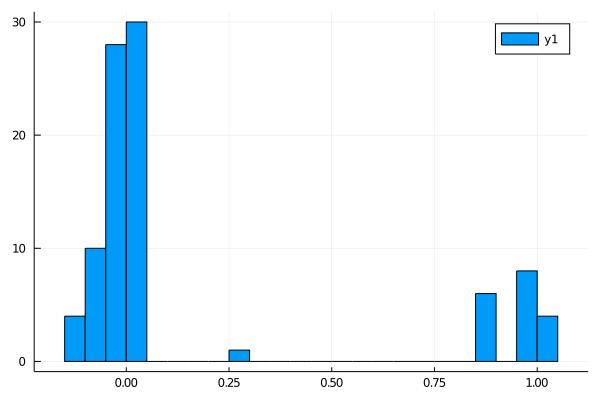

In [47]:
hist = histogram([recon(sqrt(xxx^2 + y[i]^2), atan(y[i],xxx)) for (i, xxx) in enumerate(x)], nbins=50)

In [48]:
function annulus(ρ, ϕ)
    if r1 <= ρ <= r2
        1
    else
        0
    end
end
_, __, actual =  sample_across_unit_disk(annulus, num_points)

([0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0], [0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0], [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

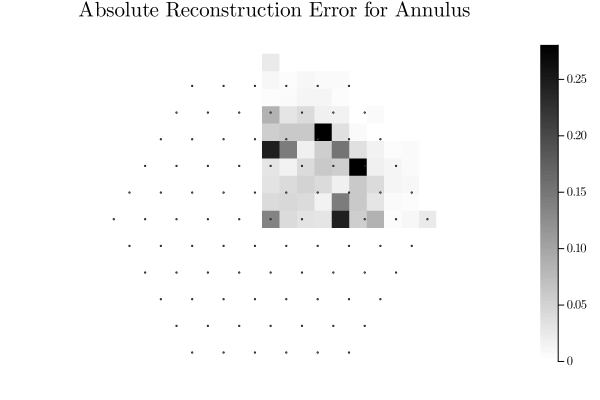

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/oZheM/src/backends/gr.jl:498


In [49]:
using Plots
using LaTeXStrings
p = palette([:white, :black], 100)
plot(heatmap(xx, yy, abs.(.5 * (samples - actual)), c=p), aspectratio=true, legend=false, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Absolute Reconstruction Error for Annulus}", fontfamily="Computer Modern")
scatter!(x, y, marker_z = (x,y)-> 0, c=p, markersize=1)

In [116]:
Γ = 1/62
ω = 2*π*180E3
θ = 0.;
b = SpinBasis(1//2)
ψ0 = 1/sqrt(2) * (spindown(b) + spinup(b))
scale = 1
zernikeeven = [[Q(i, r2, r1) for i in range(0, 10, step=1)]]
zernikeodd = []
amp = .1
μ = 0
order =  0

function infidelity_across_disk(F1, F2)
    function infidelity_polar(ρ, ϕ)
        ψ1 = F1(ρ, ϕ).data
        if r1 < ρ < r2
            ψ1 = 1/2 * [1 -1 ; -1 1]
        else
            ψ1 = 1/2 * [1 1 ; 1 1]
        end
        ψ2 = F2(ρ, ϕ).data
        infid = 1 - real(fidelity(ψ1, ψ2))
    return infid, ψ1, ψ2
    end
end

function across_disk(F1)
    function infidelity_polar(ρ, ϕ)
        ψ1 = F1(ρ, ϕ).data
    return ψ1
    end
end

function annulus(a, b)
    function rtn(ρ, ϕ)
        if a < ρ < b
            1
        else
            0
        end
    end
end


U = 2 * π * 10E3
evolution_time = π/(2*U*amp) * 1.12

step_size = evolution_time/1
T = [0.0:step_size:evolution_time;];

function annulus_spin_profile(ρ, ϕ)
    ψ0 = 1/sqrt(2) * (spindown(b) + spinup(b))
    H(t, _) = U * sin(amp*annulus(r1, r2)(ρ, ϕ)) * sigmaz(b), [], []
    _, ψ = timeevolution.master_dynamic(T, ψ0, H)
    last(ψ)
end
function evolution_evaluator_factory(ψ0, T, zernikeeven, zernikeodd, U, ψ, μ, ω, b)
    function evaluator(ρ, ϕ)
        H(t, _) = H_odf(ρ, ϕ, t, zernikeeven, zernikeodd, U, ψ, μ, ω)*sigmaz(b), [sigmam(b)], [dagger(sigmam(b))]
        _, ψTARGET = timeevolution.master_dynamic(T, ψ0, H; rates=[Γ])
        last(ψTARGET)
    end
end
function H_odf(ρ, ϕ, t, zernike_coefficients_even, zernike_coefficients_odd, U, ψ, μ, ω)
    U * sin(amp*sum([coefficients[i] * l  for (i, l) in enumerate(lookup[ρ])]))
end
exact_evolution_evaluator = evolution_evaluator_factory(ψ0, T, zernikeeven, [], U, θ, 0., ω, b)

(::var"#evaluator#242"{Ket{SpinBasis{1//2,Int64},Array{Complex{Float64},1}},Array{Float64,1},Array{Array{Real,1},1},Array{Any,1},Float64,Float64,Float64,Float64,SpinBasis{1//2,Int64}}) (generic function with 1 method)

In [117]:
infid, annulus_vals, exact = plot_triangles_across_unit_disk(infidelity_across_disk(annulus_spin_profile, exact_evolution_evaluator), x, y);

1[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.49146555016510246 + 0.09198086004135368im; 0.49146555016510246 - 0.09198086004135368im 0.5000022580594171 + 0.0im]2[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.4999861588369559 - 0.0035653810115525092im; 0.4999861588369559 + 0.0035653810115525092im 0.5000022580594171 + 0.0im]3[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.49983554264403496 + 0.012778938922918152im; 0.49983554264403496 - 0.012778938922918152im 0.5000022580594171 + 0.0im]4[0.5 -0.5; -0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im -0.49072033486691 + 0.09587571400625329im; -0.49072033486691 - 0.09587571400625329im 0.5000022580594172 + 0.0im]5[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.49998552530242457 + 0.0036531436256687405im; 0.49998552530242457 - 0.0036531436256687405im 0.5000022580594171 + 0.0im]6[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.49999683333019806 - 0.001427455801

; 0.4999956141310249 - 0.0018046661825765924im 0.5000022580594171 + 0.0im]58[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.49999683333019806 - 0.0014274558015558607im; 0.49999683333019806 + 0.0014274558015558607im 0.5000022580594171 + 0.0im]59[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.4999953540786795 + 0.001875331977858571im; 0.4999953540786795 - 0.001875331977858571im 0.5000022580594171 + 0.0im]60[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.4999667144182969 - 0.005670577048601281im; 0.4999667144182969 + 0.005670577048601281im 0.5000022580594171 + 0.0im]61[0.5 -0.5; -0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im -0.4847014949552905 - 0.12273146522905996im; -0.4847014949552905 + 0.12273146522905996im 0.5000022580594171 + 0.0im]62[0.5 0.5; 0.5 0.5]Complex{Float64}[0.4999977419405826 + 0.0im 0.4999096492631421 + 0.009445292154676363im; 0.4999096492631421 - 0.009445292154676363im 0.5000022580594171 + 0.0im]63[0.5 -0.5; -0.5 0.

In [118]:
zannulus = [real(tr([[0, 1] [1, 0]] * s)) for s in annulus_vals];

In [119]:
zseq  = [real(tr([[0, 1] [1, 0]] * s)) for s in exact];

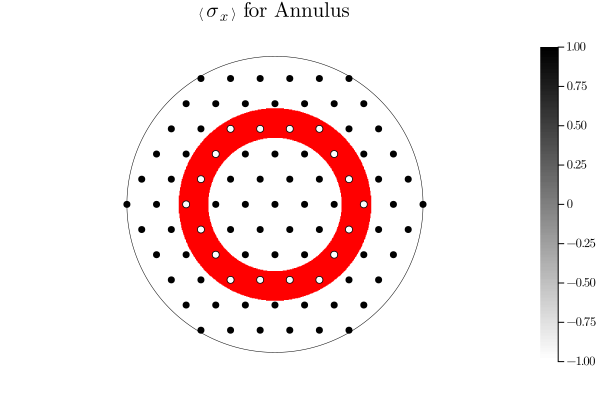

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/oZheM/src/backends/gr.jl:498


In [120]:
using LaTeXStrings
function annulus(a, b)
    function rtn(x, y)
        ρ = sqrt(x^2 + y^2)
        if a < ρ/scale < b
            1
        else
            -1
        end
    end
end
p = palette([:white, :black], 100);
scale = 2
plot(heatmap(scale*xs, scale*ys, annulus(r1, r2); c=palette([:white, :red], 100)))
scatter!(scale*x, scale*y, marker_z = zseq, c=p, clim  = (-1,1))
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\left\langle\sigma_x\right\rangle\textrm{ for Annulus}", fontfamily="Computer Modern")

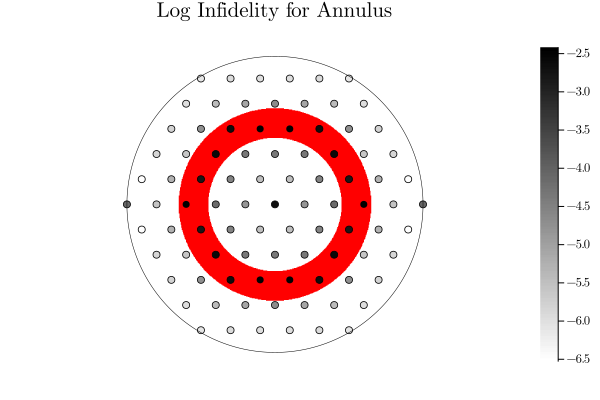

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/ampolloreno/.julia/packages/Plots/oZheM/src/backends/gr.jl:498


In [121]:
using LaTeXStrings
z = infid
function annulus(a, b)
    function rtn(x, y)
        ρ = sqrt(x^2 + y^2)
        if a < ρ/scale < b
            maximum(log.(10, z))
        else
            minimum(log.(10, z))
        end
    end
end
scale = 2
plot(heatmap(scale*xs, scale*ys, annulus(r1, r2); c=palette([:white, :red], 100)))
scatter!(scale*x, scale*y, marker_z = log.(10, z), c=palette([:white, :black], 100))
plot!(circleShape(0, 0, scale*radius), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title=L"\textrm{Log Infidelity for Annulus}", fontfamily="Computer Modern")

In [122]:
1 - maximum(infid)

0.996153234196286